# Global Power Plant Database


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv"
df = pd.read_csv(url)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (907, 27)

The column headers in the dataset: Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


This dataset contains 907 rows and 27 columns. Out of which the variables "capacity_mw" and "primary_fuel" are considered as targets for different approaches, the remaining 25 are independent variables described in the above section Project Description.

Since the dataset can be seen from two angles to find the "primary_fuel"(Classification problem) and the "capacity_mw" (Regression Problem) we are going to analyze them as target variables during the EDA.

In [6]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are two types of data (object and float64 ) present in the dataset.

- Objects (strings): country, country_long, name, gppd_idnr, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source, generation_data_source

- float64 (numeric): capacity_mw, latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, estimated_generation_gwh

The dataset presents null values.

## 1.2 Missing values
### 1.2.1 Inspecting the dataset

In [7]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

,Null values,% of missing
country,0,0.00
country_long,0,0.00
name,0,0.00
gppd_idnr,0,0.00
capacity_mw,0,0.00
latitude,46,5.07
longitude,46,5.07
primary_fuel,0,0.00
other_fuel1,709,78.17
other_fuel2,906,99.89


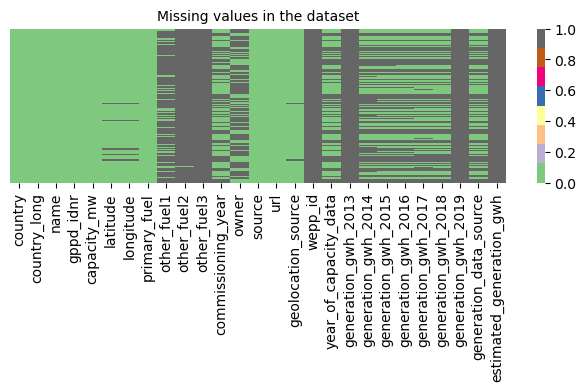

In [8]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

Some columns present null values, and in some of them all the values are null, or the majority of them, like in other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh. Considering that these columns will not provide any information to the model, we are going to drop them.
There are other columns that present some null values too, we will analyze them one by one in order to determine if we can input the null values.

## 1.2.2 Columns with no info

As we saw previously there are columns with almost no information, so we will drop them.
We will treat each column according to the percentage of null values, first, we will inspect the columns with 90% or more of missing values and drop them.

In [9]:
missing_val[missing_val['% of missing'] >= 90]

,Null values,% of missing
other_fuel2,906,99.89
other_fuel3,907,100.00
wepp_id,907,100.00
generation_gwh_2013,907,100.00
generation_gwh_2019,907,100.00
estimated_generation_gwh,907,100.00


In [10]:
cols_to_drop = missing_val[missing_val['% of missing'] > 90].index.to_list()

print(f"Columns to drop: {cols_to_drop}\nTotal columns to drop: {len(cols_to_drop)}")

df.drop(cols_to_drop, axis=1, inplace=True)
df.head(3)

Columns to drop: ['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh']
Total columns to drop: 6


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We dropped 6 columns from the dataset because all their values were null.

Next, we will check the columns with missing values between 40% and 90%, and then the rest.

In [11]:
missing_val[(missing_val['% of missing'] >= 40) & (missing_val['% of missing'] < 90)].sort_values(by='% of missing', ascending=False)

,Null values,% of missing
other_fuel1,709,78.17
owner,565,62.29
generation_gwh_2014,509,56.12
generation_gwh_2015,485,53.47
generation_gwh_2016,473,52.15
generation_gwh_2017,467,51.49
generation_gwh_2018,459,50.61
generation_data_source,458,50.50
year_of_capacity_data,388,42.78
commissioning_year,380,41.90


We are going to analyze the columns with missing values in order to determine if imputing the missing values adds value to our prediction models.

In [12]:
missing_val[(missing_val['% of missing'] > 0) & (missing_val['% of missing'] < 40)]

,Null values,% of missing
latitude,46,5.07
longitude,46,5.07
geolocation_source,19,2.09


We will analyze these columns further in the next sections, in order to find the best way to treat them.
- The columns other_fuel1 and owner have a considerable percentage of missing values, so it is important to analyze them separately.
- The percentage of missing values in latitude, longitude, and geolocation_source is low. 

In section 1.3 Features Analysis, we impute the missing values.

### 1.2.3 other_fluel1 feature

In [13]:
df.other_fuel1.unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [14]:
df.other_fuel1.value_counts(normalize=True, dropna=False)

NaN             0.781698
Oil             0.214994
Gas             0.002205
Cogeneration    0.001103
Name: other_fuel1, dtype: float64

In [15]:
df.other_fuel1.value_counts(dropna=False)

NaN             709
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

other_fluel1 is a categorical variable with 3 unique values, where  98.48% of the non-null data correspond to the Oil category. If we input the missing values with the most frequent value this column will not give a lot of info to the prediction model. This column will be dropped.

### 1.2.4 Owner feature

In [16]:
print(f"Column owner has {df.owner.nunique()} unique values")

Column owner has 280 unique values


In [17]:
df.owner.value_counts(dropna=False)

NaN                                                            565
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Sterling Agro Industries ltd.                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 281, dtype: int64

In [18]:
print( f"The most frequent values in owner are: \n {df.owner.mode()}")

The most frequent values in owner are: 
 0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
Name: owner, dtype: object


This column has 62.29% missing values, its purpose is only to identify the plant. When we analyze he data there is not clearly identified most frequent value as we can see below. This column will be dropped too.

### 1.2.5 Dropping columns: other_fluel1 and owner

<!-- df_backup = df.copy() -->

In [20]:
df.drop(['other_fuel1','owner'], axis=1, inplace=True)
print(f"We drop 2 more columns, the new dimension of the dataset is {df.shape}")

We drop 2 more columns, the new dimension of the dataset is (907, 19)


### 1.2.6 Rows with no info

First, we identify the remaining columns with missing values. 

In [21]:
# Storing only the columns with missing values
missing_val = missing_val[missing_val['Null values'] > 0]

# Dropping the rows refers to the columns already dropped
missing_val = missing_val.drop(cols_to_drop + ['other_fuel1','owner'])
missing_val

,Null values,% of missing
latitude,46,5.07
longitude,46,5.07
commissioning_year,380,41.90
geolocation_source,19,2.09
year_of_capacity_data,388,42.78
generation_gwh_2014,509,56.12
generation_gwh_2015,485,53.47
generation_gwh_2016,473,52.15
generation_gwh_2017,467,51.49
generation_gwh_2018,459,50.61


In [22]:
# Create a mask for rows where all specified columns have missing values
missing_values_col = missing_val.index.to_list()
mask = df[missing_values_col].isnull().all(axis=1)

# Use the mask to filter the DataFrame and get rows with all missing values
rows_with_all_missing = df[mask]

# Display the resulting rows
print(f"Columns with missing values: {missing_values_col} \nNumber of rows with null values: {rows_with_all_missing.shape[0]}\n")
print("Rows with null values:")
rows_with_all_missing 

Columns with missing values: ['latitude', 'longitude', 'commissioning_year', 'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'] 
Number of rows with null values: 15

Rows with null values:


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
67,IND,India,BCPL Wind Farm,WRI1026675,5.00,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1218...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,IND,India,Davangere Wind Farm,WRI1026100,125.00,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1142...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,IND,India,Essel Mining Wind Farm,WRI1026101,75.00,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/filestorage/O/6/L/O6LOW...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,IND,India,Landewadi Wind Farm,WRI1026790,4.00,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,IND,India,NSL Wind Farm,WRI1026676,27.65,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1173...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,IND,India,RSMNL Wind Farm,WRI1026679,22.50,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/BVQI1201770...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,IND,India,Ruchi Soya Palsodi Wind Farm,WRI1026678,22.50,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV128515...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,IND,India,Sivalaperi Wind Farm,WRI1026677,24.00,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV135219...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,IND,India,Sterling Agro Akal Wind Farm,WRI1026754,3.00,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/SGS-UKL1333...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,IND,India,Sterling Agro Mokla Wind Farm,WRI1026755,6.30,NaN,NaN,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/SGS-UKL1333...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Dropping the rows with missing values in almost all columns
df = df[~mask]
print(f"The new dimension of the dataset is {df.shape}")

The new dimension of the dataset is (892, 19)


Dropping these 15 rows that do not have any information represents 1.65% of the data.

## 1.3 Features Analysis
### 1.3.1 Unique values

In [24]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

,No. of unique values,type
country,1,object
country_long,1,object
name,892,object
gppd_idnr,892,object
capacity_mw,357,float64
latitude,836,float64
longitude,827,float64
primary_fuel,8,object
commissioning_year,73,float64
source,191,object


About the number of unique values:

- There are variables with just 1 unique value like country, country_long, year_of_capacity_data, and generation_data_source, they do not contribute with valuable data for the prediction model since all the rows have the same value. Therefore we will drop them.

- The variables name and gdpd_idnr have the same unique values as the dataset rows, these columns only serves to identify each record but doesn't influence the target variable. Therefore we can drop them.

- primary_fuel is the target variable for the classification task and has 8 unique values of 892 total in the dataset, therefore we can confirm we are facing a classification problem.

- capacity_mw is the other target variable with 357 unique values of 892 total in the dataset. We are facing a regression problem since the target variable is continuous and numerical. 

#### 1.3.1.1 Primary Fuel unique values

In [25]:
# Inspect the unique values of the target variable
column = 'primary_fuel'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")
print(f"# unique values: {df[column].nunique()}\n")

Feature primary_fuel:
Coal       258
Hydro      251
Solar      127
Wind       108
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
Unique values: ['Biomass', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind']
# unique values: 8



As we can see the target variable has 8 unique values of the 892 rows in the dataset. In order to predict this feature we need to build a classification model. The dataset seems to be imbalanced.

#### 1.3.1.2 Capacity_mw unique values

In [26]:
# Inspect the unique values of the target variable
column = 'capacity_mw'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"# unique values: {df[column].nunique()}\n")

Feature capacity_mw:
5.0       38
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
195.0      1
291.0      1
645.0      1
41.4       1
106.6      1
Name: capacity_mw, Length: 357, dtype: int64
# unique values: 357



The capacity_mw column has 361 unique values of the 892 rows in the dataset. To predict this feature we are going to apply a regression model since the variable is numerical and continuous.

#### 1.3.1.3 Columns with only 1 unique value

In [27]:
# Inspect the unique values in columns to drop
for column in ['country', 'country_long', 'year_of_capacity_data', 'generation_data_source']:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"Unique values: {df[column].unique()}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature country:
IND    892
Name: country, dtype: int64
Unique values: ['IND']
# unique values: 1

Feature country_long:
India    892
Name: country_long, dtype: int64
Unique values: ['India']
# unique values: 1

Feature year_of_capacity_data:
2019.0    519
Name: year_of_capacity_data, dtype: int64
Unique values: [  nan 2019.]
# unique values: 1

Feature generation_data_source:
Central Electricity Authority    449
Name: generation_data_source, dtype: int64
Unique values: [nan 'Central Electricity Authority']
# unique values: 1



Here we confirm that these columns have the same value for all the records.

#### 1.3.1.4 Dropping columns 

In [28]:
# Define columns to drop
columns_to_drop = ['name', 'gppd_idnr',  # purpose identification
                   'country', 'country_long', 'year_of_capacity_data', 'generation_data_source',]  # only one value
columns_to_drop

['name',
 'gppd_idnr',
 'country',
 'country_long',
 'year_of_capacity_data',
 'generation_data_source']

<!-- # make a backup of df
df_backup2 = df.copy() -->

In [30]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [31]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (892, 13)

The column headers in the dataset: Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')


Now, the dataset contains 892 rows and 13 columns.

#### 1.3.1.6 Independent variables unique values

In [32]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df.columns:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: {categorical_col}")
print(f"Numerical Columns: {numerical_col}")

Categorical Columns: ['primary_fuel', 'source', 'url', 'geolocation_source']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


#### Categorical columns

In [33]:
# First we are going to remove the target variable which has already been analyzed
categorical_col.remove('primary_fuel')
categorical_col

['source', 'url', 'geolocation_source']

In [34]:
for column in categorical_col:
    print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature source:
Central Electricity Authority                                  519
CDM                                                            109
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64
# unique values: 191

Feature url:
http://www.cea.nic.in/                                                                                                                                          519
http://w

The features source and url have 191 and 292 unique values respectively. The feature geolocation_source has 3 unique values.

#### Numerical columns

In [35]:
# we are going to remove the target variable which has already been analyzed
numerical_col.remove('capacity_mw')
numerical_col

['latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [36]:
for column in numerical_col:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature latitude:
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64
# unique values: 836

Feature longitude:
71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64
# unique values: 827

Feature commissioning_year:
2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64
# unique values: 73

Feature generation_gwh_2014:
0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64
# unique values: 371

Fea

The features latitude, longitude, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018 are numerical and continuous.

The feature commissioning_year is numerical and discrete with 73 values.

We find that some of the columns have many records with value 0, as follows: generation_gwh_2014 (28 zeros), generation_gwh_2015 (27 zeros), generation_gwh_2016 (30 zeros), generation_gwh_2017 (32 zeros), generation_gwh_2018 (39 zeros)

### 1.3.2 Imputing Missing values

In [37]:
# Reviewing the missing values in the remaining data
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val = missing_val[missing_val['Null values'] > 0]
missing_val


,Null values,% of missing
latitude,31,3.48
longitude,31,3.48
commissioning_year,365,40.92
geolocation_source,4,0.45
generation_gwh_2014,494,55.38
generation_gwh_2015,470,52.69
generation_gwh_2016,458,51.35
generation_gwh_2017,452,50.67
generation_gwh_2018,444,49.78


As we can see there are still missing values in 9 columns. In the majority of them, we are going to impute the missing values.

#### 1.3.2.1 Commissioning year missing values

In [38]:
# Inspecting the values in the column commissioning_year
df.commissioning_year.value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

Since this column represents a year, it could be considered categorical although is numerical. In this case, we use the mode to impute the missing values which represent 40.92% of the data.

In [39]:
# Counting the number of null values in the column 
col = 'commissioning_year'
print(f"Missing values in {col}: {df[col].isnull().sum()}")

# Get the mode 
mode_value = df[col].mode()[0]  #the [0] is used to get the first mode if there are multiple
print(f"Impute the missing values with the mode {mode_value}")

# Impute the missing values using the mode
df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

print(f"Missing values in {col}: {df[col].isnull().sum()}")

Missing values in commissioning_year: 365
Impute the missing values with the mode 2015.0
Missing values in commissioning_year: 0


#### 1.3.2.2 Generation gwh missing values

In [40]:
generation_col = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# Reviewing the Skew in the generation gwh columns
df[generation_col].skew()

generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [41]:
# listing the possible imputation values for each column
for col in generation_col:
    print(f"Column={col} Mode={df[col].mode()[0]} Median(50%)={df[col].median():.6f}  Mean={df[col].mean():.6f}")

Column=generation_gwh_2014 Mode=0.0 Median(50%)=801.123775  Mean=2431.823590
Column=generation_gwh_2015 Mode=0.0 Median(50%)=711.181225  Mean=2428.226946
Column=generation_gwh_2016 Mode=0.0 Median(50%)=737.205450  Mean=2467.936859
Column=generation_gwh_2017 Mode=0.0 Median(50%)=817.977250  Mean=2547.759305
Column=generation_gwh_2018 Mode=0.0 Median(50%)=751.644375  Mean=2600.804099


Seems these columns are skewed to the right since the mean value is larger than the median(50%). Therefore, we will use the median to impute the missing values.

<!-- df_backup3 = df.copy() -->

In [43]:
for col in generation_col:
    # Counting the number of null values in the column 
    print(f"Missing values in {col}: {df[col].isnull().sum()}")

    # Get the median 
    impute_value = round(df[col].median(),6) 
    print(f"Impute the missing values in {col} with the median: {impute_value}")

    # Impute the missing values using the mode
    df[col].fillna(impute_value, inplace=True)  # Fill missing values with the impute value

    print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Missing values in generation_gwh_2014: 494
Impute the missing values in generation_gwh_2014 with the median: 801.123775
Missing values in generation_gwh_2014: 0

Missing values in generation_gwh_2015: 470
Impute the missing values in generation_gwh_2015 with the median: 711.181225
Missing values in generation_gwh_2015: 0

Missing values in generation_gwh_2016: 458
Impute the missing values in generation_gwh_2016 with the median: 737.20545
Missing values in generation_gwh_2016: 0

Missing values in generation_gwh_2017: 452
Impute the missing values in generation_gwh_2017 with the median: 817.97725
Missing values in generation_gwh_2017: 0

Missing values in generation_gwh_2018: 444
Impute the missing values in generation_gwh_2018 with the median: 751.644375
Missing values in generation_gwh_2018: 0



#### 1.3.2.3 Geolocation Source missing values

In [44]:
df.geolocation_source.value_counts(dropna=False)

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
NaN                                       4
Name: geolocation_source, dtype: int64

Since this feature is categorical we are going to use the mode to impute the 4 missing values, which is a small sample.

In [45]:
# Counting the number of null values in the column 
col = 'geolocation_source'
print(f"Missing values in {col}: {df[col].isnull().sum()}")

# Get the mode 
mode_value = df[col].mode()[0]  #the [0] is used to get the first mode if there are multiple
print(f"Impute the missing values with the mode {mode_value}")

# Impute the missing values using the mode
df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

print(f"Missing values in {col}: {df[col].isnull().sum()}")

Missing values in geolocation_source: 4
Impute the missing values with the mode WRI
Missing values in geolocation_source: 0


#### 1.3.2.4 Latitude and longitude missing values

In [46]:
# Inspecting the missing values in latitud and longitude 
df[df['latitude'].isna() | df['longitude'].isna() ].shape

(31, 13)

Seems that the same records have missing values in both columns.

Considering the proportion of missing values in the latitude and longitude column is small (3.48%), imputing latitude and longitude values may not always make sense, especially if the data represents specific geographic locations. Therefore deleting the 31 rows with missing values ensures that the imputed values do not introduce bias into our analysis.

In [47]:
# Dropping the missing values in latitude and longitude
df_new = df.dropna(subset=['latitude','longitude'])

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

31 rows with missing values were deleted.
This represent 3.48% of the data.
In the new dataset there are 861 rows and 13 columns.


#### 1.3.2.5 Last check for missing values

In [48]:
df.isnull().sum().sum()

0

No more missing values to remove.

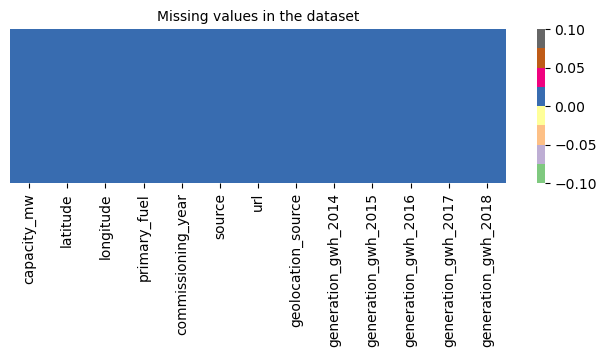

In [49]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

In [50]:
df.shape

(861, 13)

Now, the studied dataframe has 861 rows and 13 columns with no missing values. We lost about 5.07% of the data dropping some rows.

### 1.3.3 Summary statistics of the numerical and non-numerical variables

In [51]:
# Summary statistics of numerical columns
stats = df.describe()
stats

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,340.382051,21.197918,77.464907,2004.637631,1559.605865,1557.154294,1611.600037,1706.607740,1717.389649
std,601.830519,6.239612,4.939316,15.619864,2852.242956,3056.027775,3075.983945,3118.100722,3242.619542
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,16.773900,74.256200,1998.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,60.000000,21.780000,76.719500,2014.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,412.020000,25.512400,79.440800,2015.000000,801.123775,711.181225,737.205450,829.611100,881.020000
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [52]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,primary_fuel,source,url,geolocation_source
count,861,861,861,861
unique,8,191,288,3
top,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
freq,253,492,492,738


**Observations**
- The summary of the dataset looks perfect since there are no negative/invalid values present.
- The counts of all the columns are the same which means there are no more missing values in the dataset

In [53]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

generation_gwh_2018    965.745274
generation_gwh_2017    888.630490
generation_gwh_2016    874.394587
generation_gwh_2015    845.973069
generation_gwh_2014    758.482090
capacity_mw            280.382051
longitude                0.745407
latitude                -0.582082
commissioning_year      -9.362369
dtype: float64

The mean value is larger than the median(50%) in all generation gwh features, capacity_mw. Therefore, the data is skewed to the right.
The skewness in longitude and latitude will not be considered since the data represents a specific location, if we change the data we would be altering it.
The column commissioning_year represents a year, it could be considered categorical although is numerical, as we see in section 1.3.2.1.

In [54]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

generation_gwh_2017    27173.190816
generation_gwh_2018    26933.371267
generation_gwh_2015    22869.790155
generation_gwh_2016    22251.432072
generation_gwh_2014    20862.908224
capacity_mw             3215.956911
longitude                  8.064462
latitude                   0.971857
commissioning_year       -17.877359
dtype: float64

Since the max value is greater than two standard deviations plus the mean in the features listed above, there could be outliers in the data. The feature commissioning_year would be treated as categorical and has no outliers.

### 1.3.3 Duplicates

In [55]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 13)

There are no duplicate values in the dataset.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 capacity_mw feature

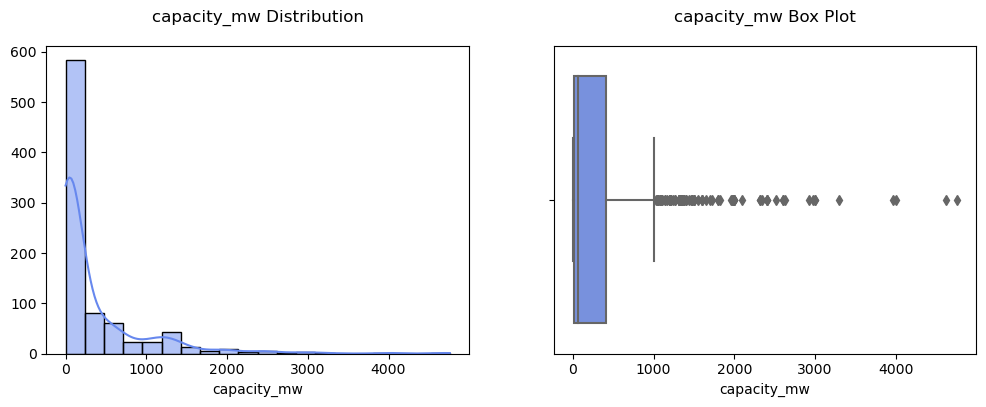

Skewness of capacity_mw : 3.0371906189316134


In [56]:
#Visualize target distribution
col = 'capacity_mw'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of capacity_mw is skewed to the right. There are outliers present in the Box plot.

#### 1.4.1.2 Primary fuel feature

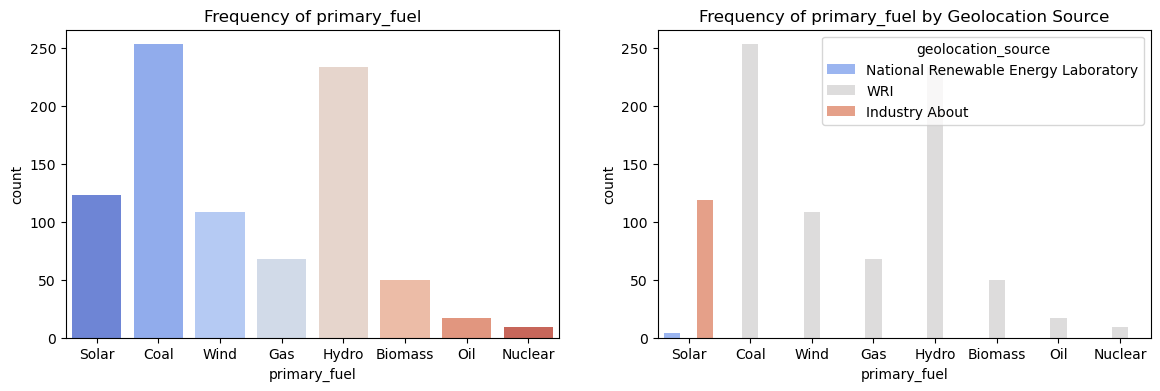

In [57]:
# Visualize the frequency of categorical target
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

column = 'primary_fuel'
sns.countplot(data=df, x=column, ax=axs[0], palette='coolwarm')
axs[0].set_title(f"Frequency of {column}")

sns.countplot(data=df, x=column, ax=axs[1], hue='geolocation_source', palette='coolwarm')
axs[1].set_title(f"Frequency of {column} by Geolocation Source")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [58]:
df[column].value_counts(normalize=True)

Coal       0.293844
Hydro      0.270616
Solar      0.142857
Wind       0.125436
Gas        0.078978
Biomass    0.058072
Oil        0.019744
Nuclear    0.010453
Name: primary_fuel, dtype: float64

- 29.38% of the data correspond to Coal, followdc by 27.06% wiht Hydro, and 14.29% as Solar primary fuel.
- The feature "primary_fuel" is imbalanced. We will balance when the classification prediction model is built.

#### 1.4.1.3 Independent variables 

##### Categorical columns

In [59]:
categorical_col

['source', 'url', 'geolocation_source']

Since the source and url have too many unique values we are going to plot only the 40 most representative values. These columns will be encoded later.

##### Source

In [60]:
# Subsetting the 40 Most representative values
column = 'source'
data = df[column].value_counts()[:40].to_frame('Frequency')
data

,Frequency
Central Electricity Authority,492
CDM,109
Lancosola,10
National Thermal Power Corporation (NTPC),6
National Renewable Energy Laboratory,4
Maharashtra State Power Generation Co Ltd (MAHAGENCO),4
Reliance Power Ltd,4
Rajasthan Renewable Energy Corporation Limited (RREC),4
Jk Cement ltd,4
Acc Acc ltd,4


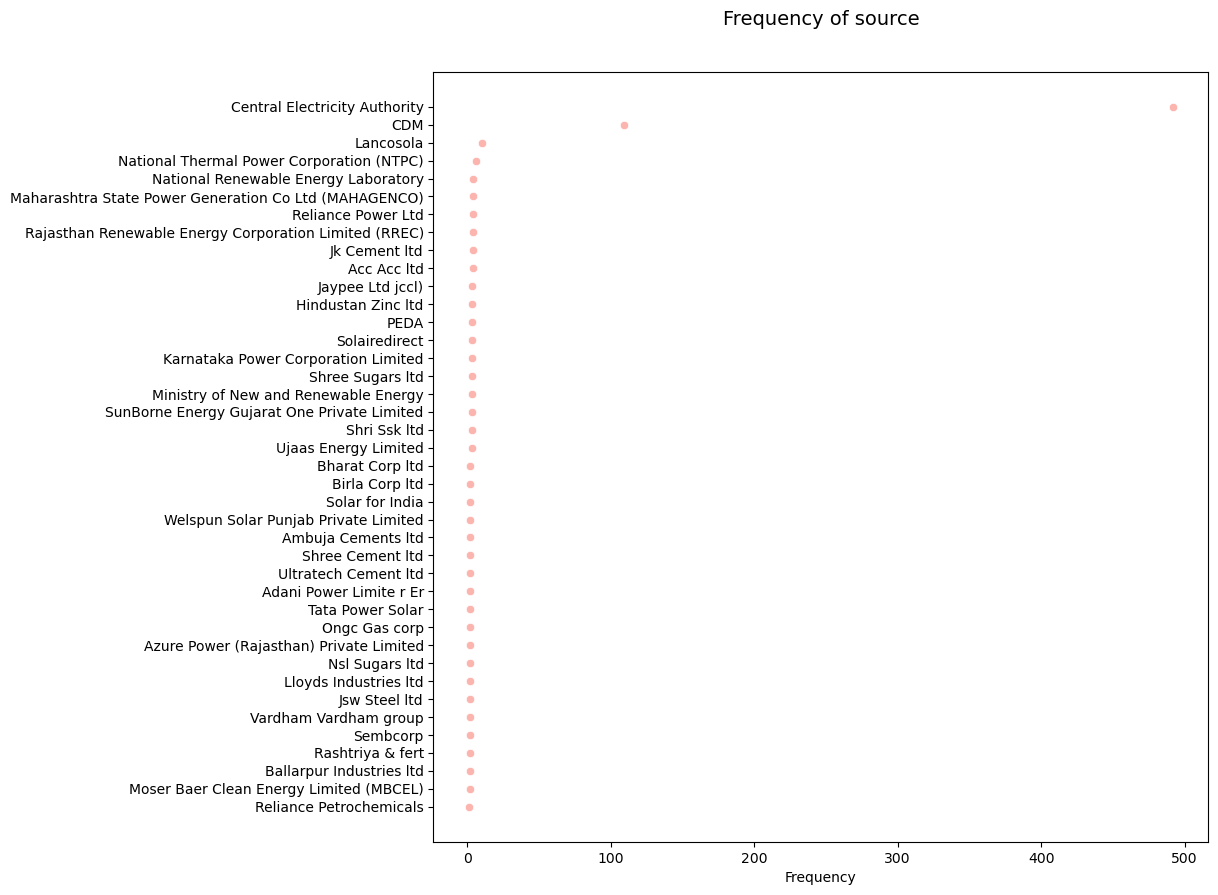

In [61]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of categorical variables
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(y=data.index, x='Frequency', data=data)

plt.title(f"Frequency of {column}", size=14, y=1.05);

##### URL

In [62]:
# Subsetting the 40 Most representative values
column = 'url'
data = df[column].value_counts()[:40].to_frame('Frequency')
data

,Frequency
http://www.cea.nic.in/,492
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf,7
http://www.ntpc.co.in,6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf,5
http://www.acclimited.com/,4
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf,4
http://www.welspunrenewables.com,4
http://www.moserbaersolar.com,4
http://energy.rajasthan.gov.in/content/dam/raj/energy/common/Details%20of%20commissioned%20Solar%20Projects%20.pdf,4
http://www.azurepower.com,4


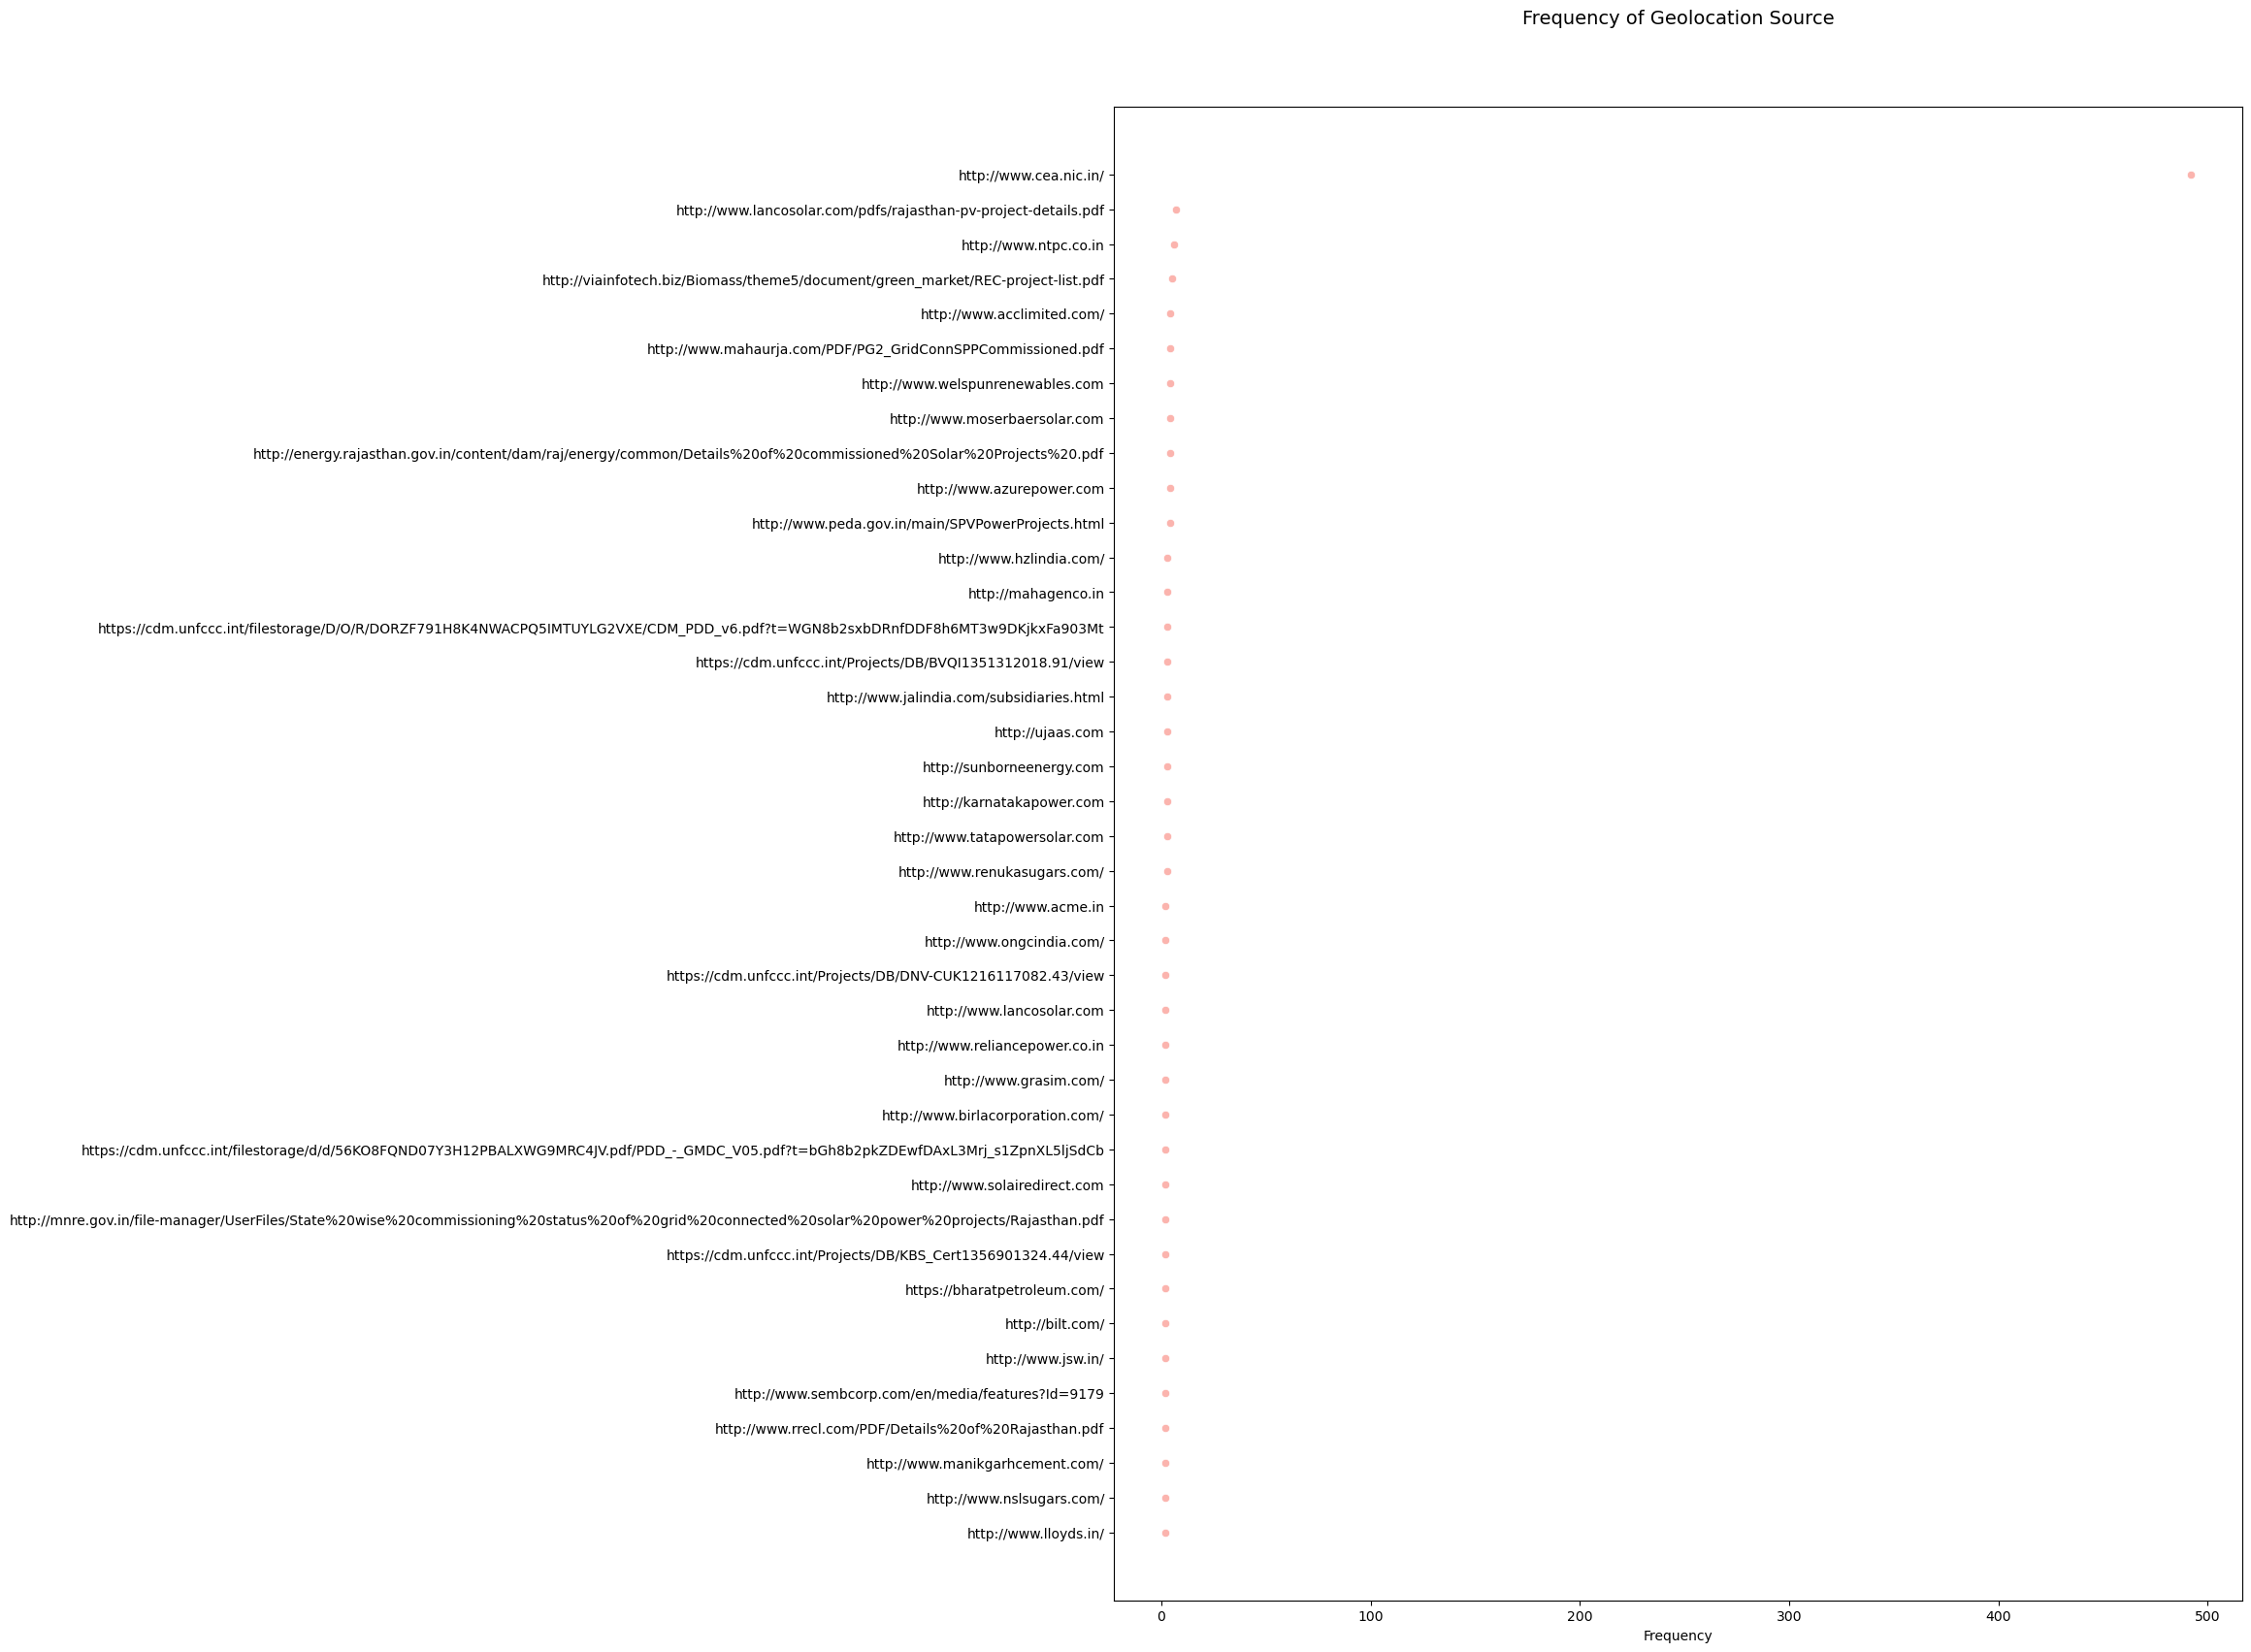

In [63]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of categorical variables
plt.figure(figsize=(15, 20))
ax = sns.scatterplot(y=data.index, x='Frequency', data=data)
# show_percentage(ax, len(df)) 

# plt.xlabel('Geolocation Source', size=10, labelpad=8)
# plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Geolocation Source", size=14, y=1.05);

##### Geolocation Source

In [64]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

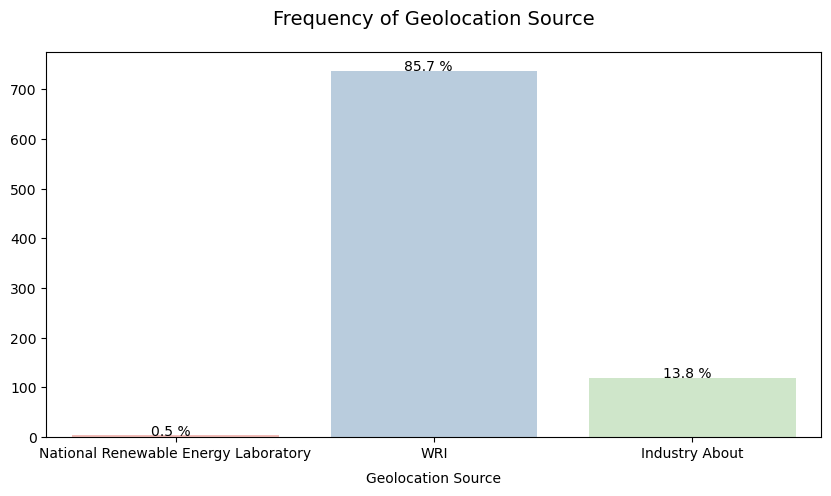

In [65]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of categorical variables
column = 'geolocation_source'
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=column, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('Geolocation Source', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Geolocation Source", size=14, y=1.05);

85.7% of geolocation data comes from the WRI, followed by 13.8% from Industry About, and 0.5% from National Renewable Energy Laboratory.

#### Numerical columns

In [66]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. latitude
2. longitude
3. commissioning_year
4. generation_gwh_2014
5. generation_gwh_2015
6. generation_gwh_2016
7. generation_gwh_2017
8. generation_gwh_2018


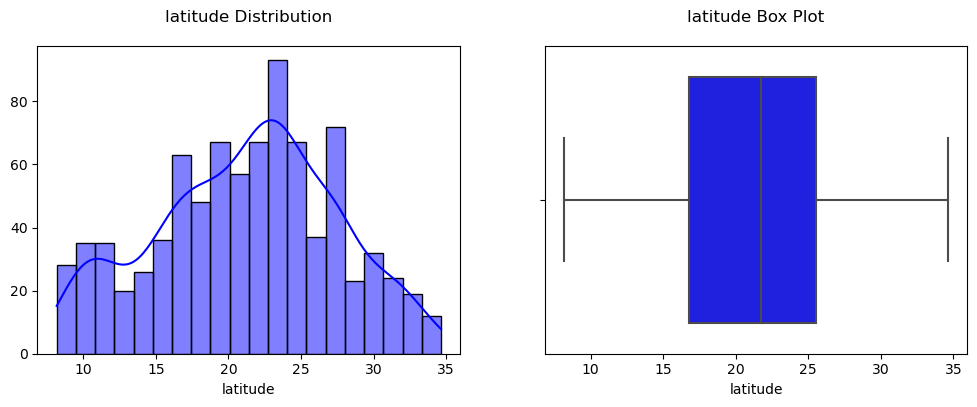

Skewness of latitude : -0.14586567454259738


In [67]:
#Visualize (1) latitude
col = 'latitude'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of latitude
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'latitude' is slightly skewed to the left. There are no outliers present in the Box plot.

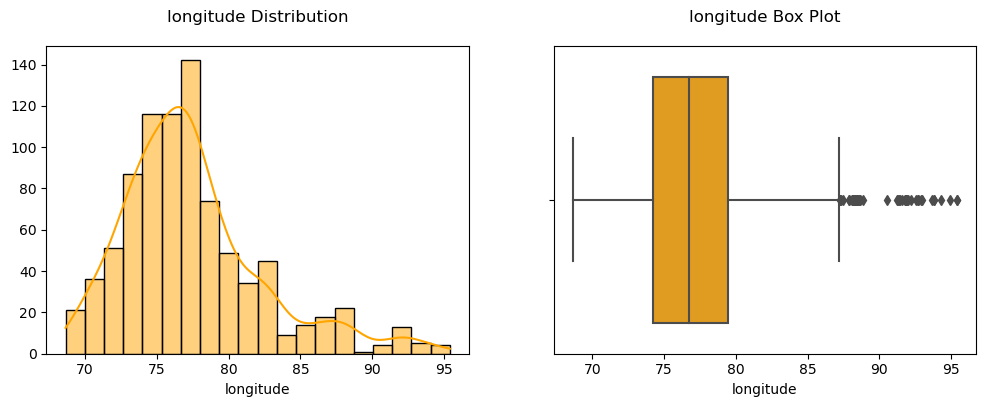

Skewness of longitude : 1.112646292133124


In [68]:
#Visualize (2) longitude
col = 'longitude'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of longitude
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'longitude' is skewed to the right. There are outliers present in the Box plot.

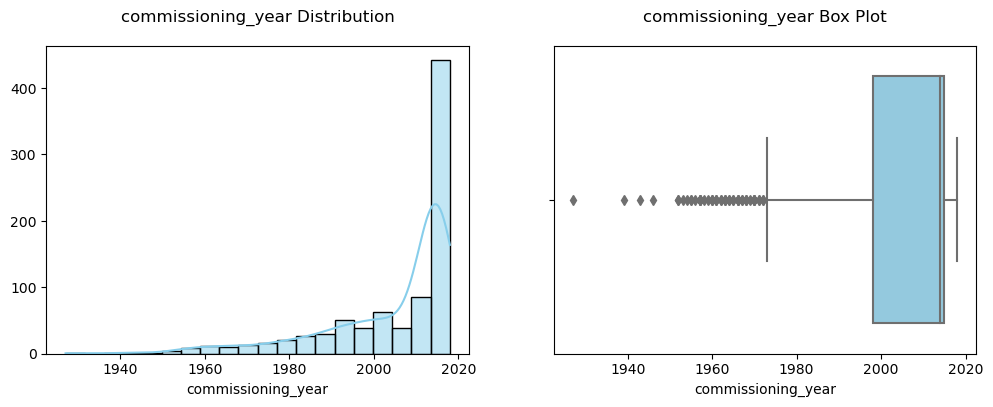

Skewness of commissioning_year : -1.6835845775540759


In [69]:
#Visualize (3) commissioning_year
col = 'commissioning_year'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of commissioning_year
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'commissioning_year' is skewed to the left. There are outliers present in the Box plot.

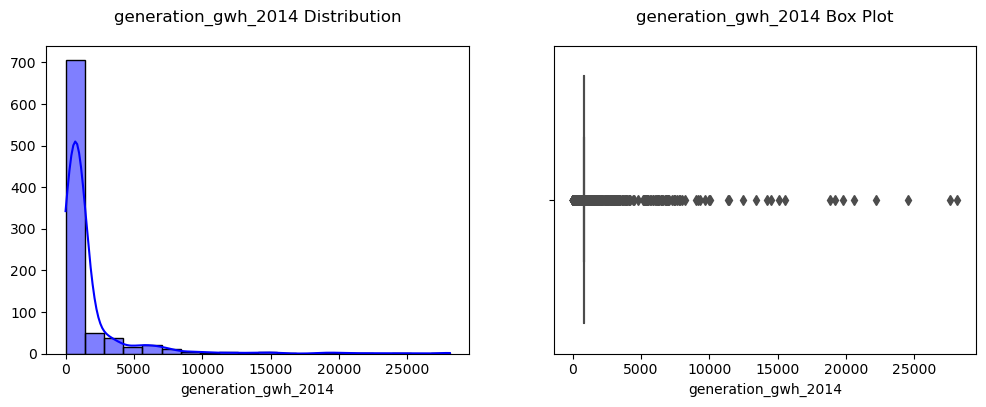

Skewness of generation_gwh_2014 : 5.179125572225037


In [70]:
#Visualize (4) generation_gwh_2014
col = 'generation_gwh_2014'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2014
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2014' is skewed to the right. There are outliers present in the Box plot.

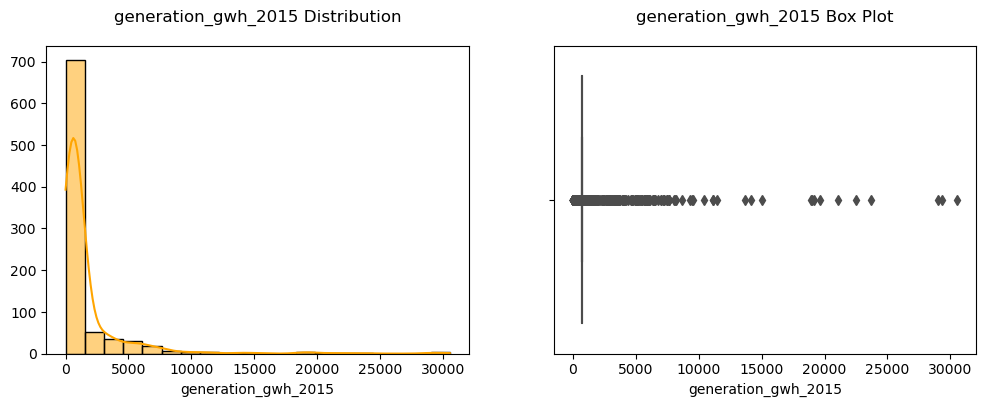

Skewness of generation_gwh_2015 : 5.42100121719291


In [71]:
#Visualize (5) generation_gwh_2015
col = 'generation_gwh_2015'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total generation_gwh_2015
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2015' is skewed to the right. There are outliers present in the Box plot.

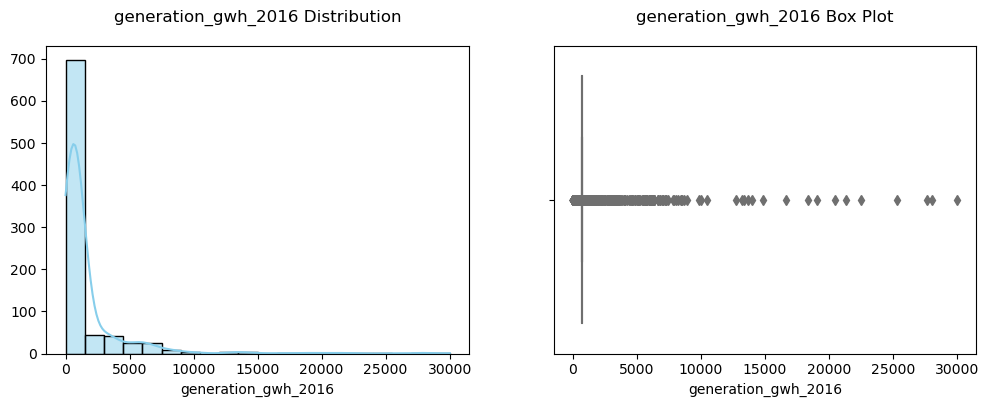

Skewness of generation_gwh_2016 : 5.145641462711484


In [72]:
#Visualize (6) generation_gwh_2016
col = 'generation_gwh_2016'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2016
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2016' is skewed to the right. There are outliers present in the Box plot.

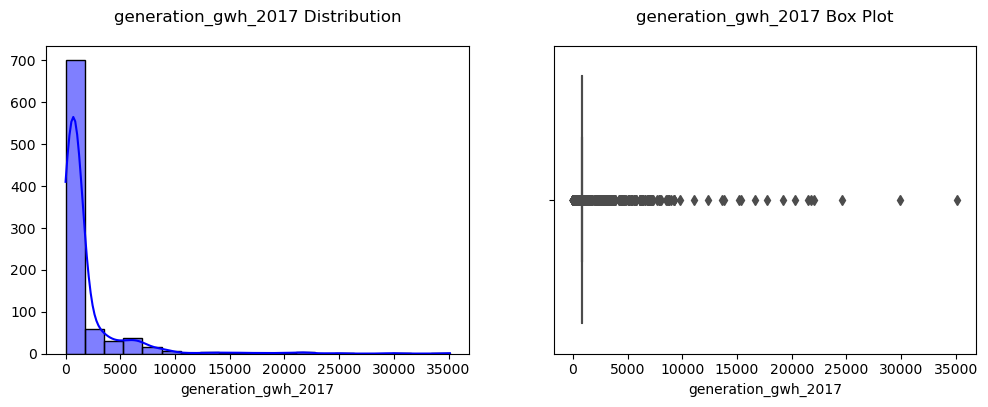

Skewness of generation_gwh_2017 : 5.179391960447339


In [73]:
#Visualize (7) generation_gwh_2017
col = 'generation_gwh_2017'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2017
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2017' is skewed to the right. There are outliers present in the Box plot.

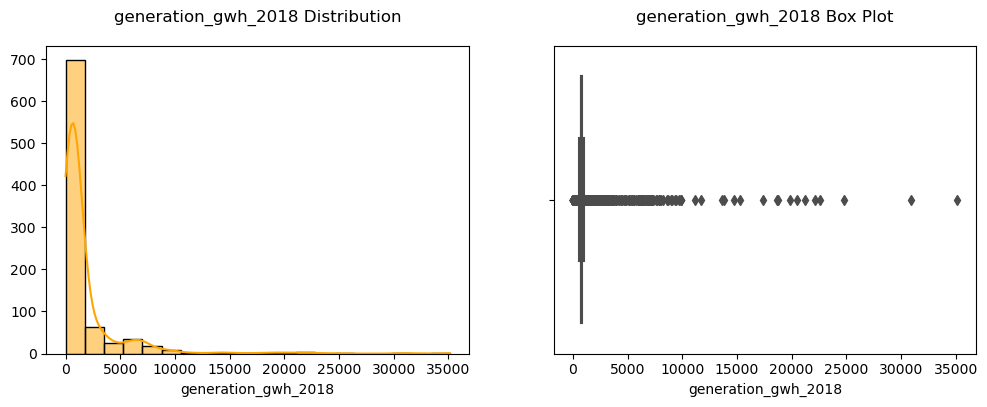

Skewness of generation_gwh_2018 : 5.001083418244179


In [74]:
#Visualize (8) generation_gwh_2018
col = 'generation_gwh_2018'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2018
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2018' is skewed to the right. There are outliers present in the Box plot.

#### 1.4.1.4 Univariate Boxplot

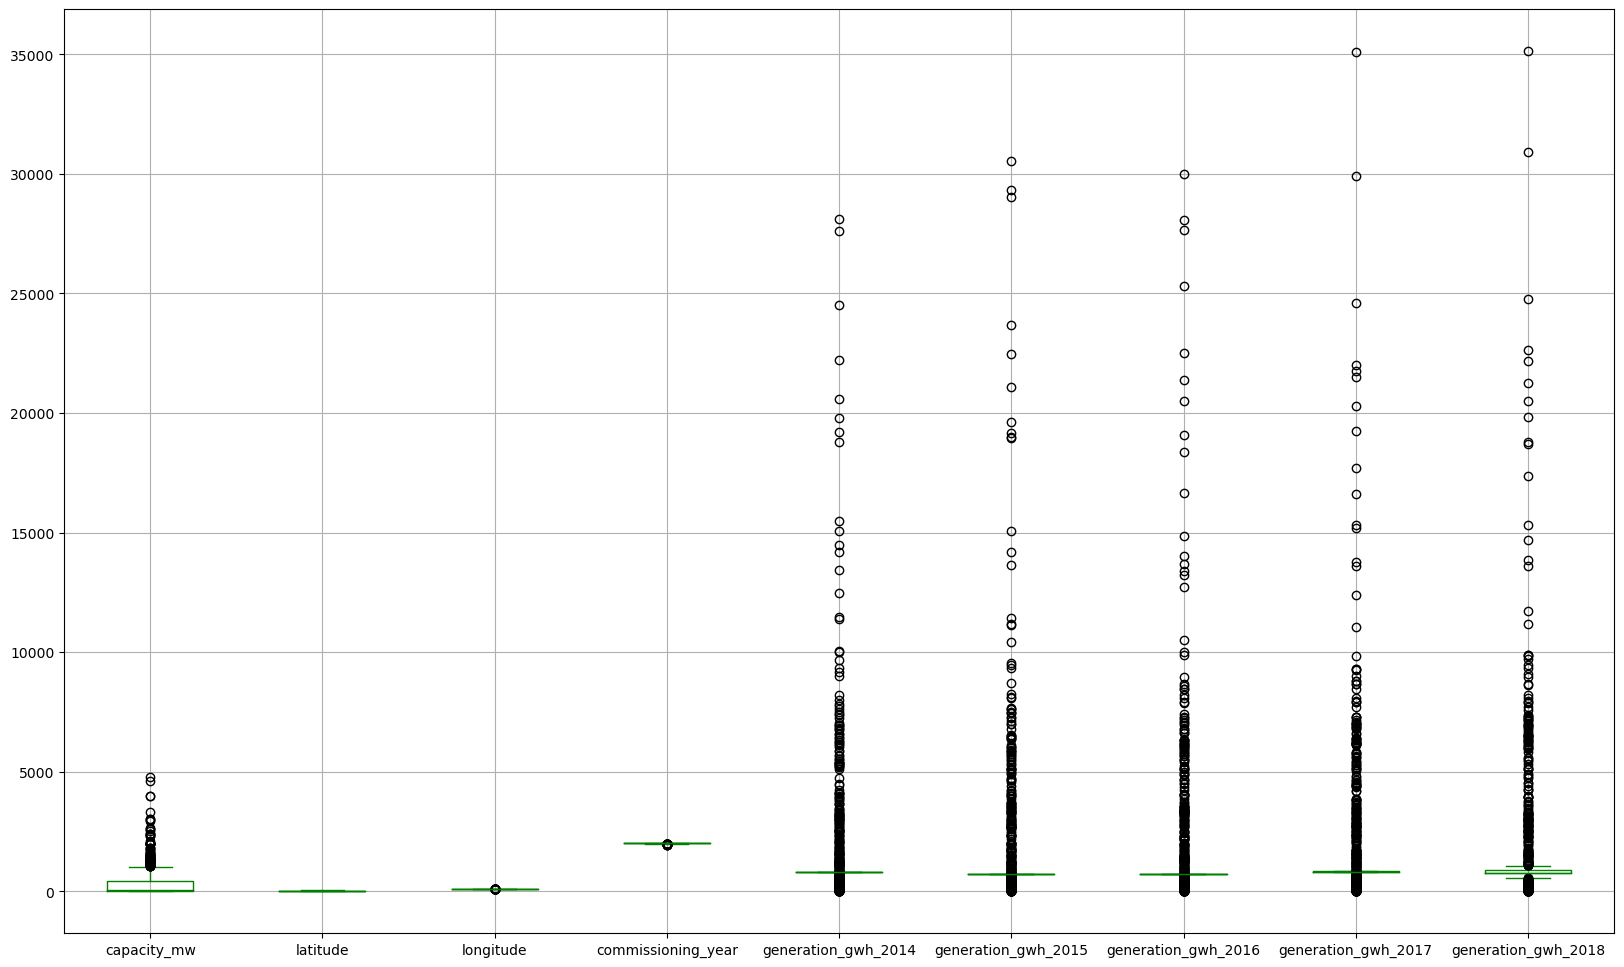

In [75]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='green')
plt.show()

The data is in different scales therefore it will be scaled later in the analysis.

### 1.4.2  Bivariate Analysis

#### 1.4.2.1 Capacity in mega-watts according to Primary Fuel

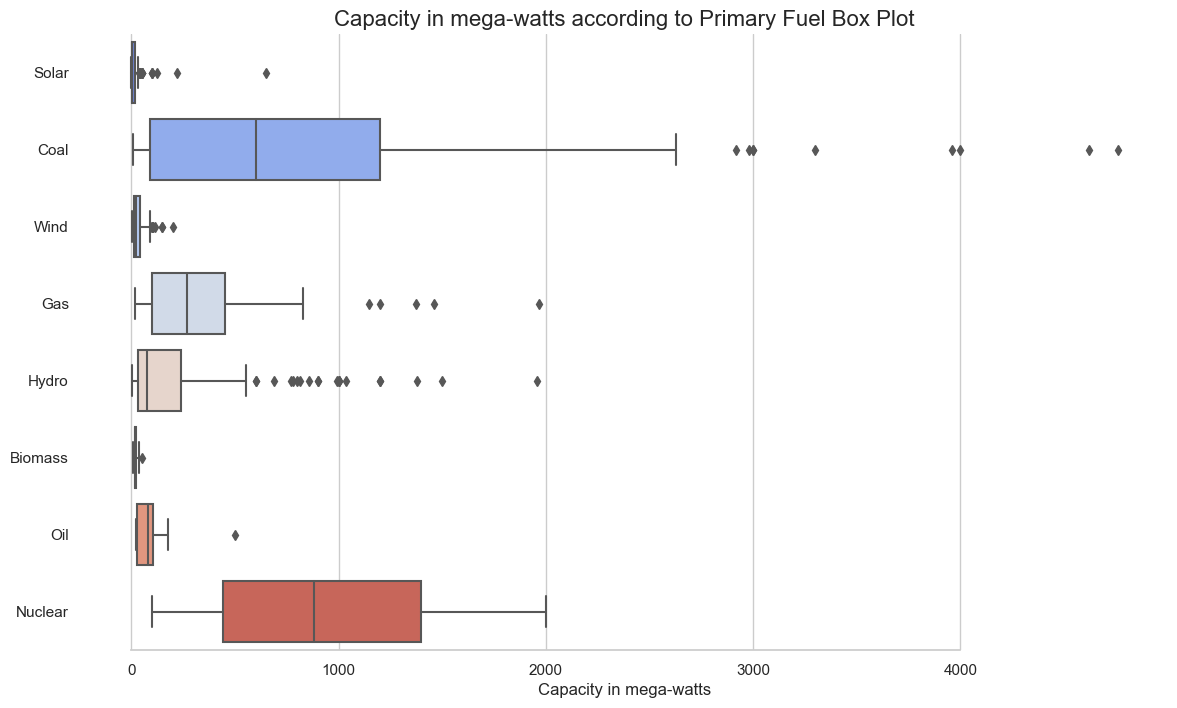

In [83]:
sns.set_theme(style="whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 8))

sns.boxplot( x='capacity_mw', y='primary_fuel', data= df, palette='coolwarm')

# visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel='Capacity in mega-watts')
sns.despine(trim=True, left=True)

plt.title('Capacity in mega-watts according to Primary Fuel Box Plot', size=16, y=1)
plt.show()

The nuclear plants have the greatest energy production capacity and then come in order as follows coal, gas, hydro, oil, wind, solar, and biomass plants. Being Solar and biomass plants the ones with the least capacity to produce energy.

Also, we can see there are some outliers in the data which the primary fuel is Coal, Hydro, Gas, and Solar.

#### 1.4.2.2 Comparing the Capacity in mega-watts with the number of plants registered according to the primary fuel

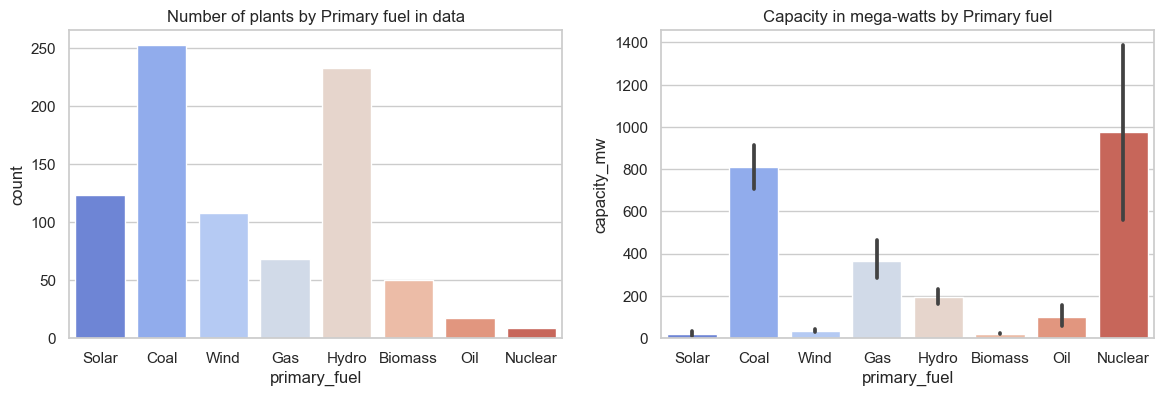

In [84]:
# Visualize the frequency of categorical target
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

column = 'primary_fuel'
sns.countplot(data=df, x=column, ax=axs[0], palette='coolwarm')
axs[0].set_title(f"Number of plants by Primary fuel in data")

sns.barplot( y='capacity_mw', x='primary_fuel', data= df, palette='coolwarm');
axs[1].set_title(f"Capacity in mega-watts by Primary fuel")

plt.subplots_adjust(hspace=0.5)
plt.show()

There is a greater presence of Coal and Hydro plants and a minimal presence of nuclear plants. However, nuclear plants are the ones with the greatest production capacity, followed by coal plants. In the following sections, we will analyze the generation over the years of the plants with different primary fuels.

#### 1.4.2.3 Average Generation in giga-watts through years Box Plot

First, we combine the power generation columns through the years for analysis purposes. Then, we will plot the power generation according to the primary fuel.

In [85]:
# Combine the power generation columns
df_generation_1c = pd.melt(df, id_vars=['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year'], value_vars = generation_col ,var_name='year', value_name='generation_gwh')

# Extract the year
df_generation_1c['year'] = df_generation_1c['year'].str.extract(r'(\d{4})')

df_generation_1c.sample(10)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year,generation_gwh
1823,750.00,22.4673,88.1400,Coal,2001.0,2016,4974.380000
476,14.65,17.5727,73.9032,Wind,2015.0,2014,801.123775
495,10.00,22.9649,78.8132,Biomass,2015.0,2014,801.123775
58,90.00,28.4723,79.8066,Coal,2011.0,2014,505.760000
2294,900.00,23.1975,86.0970,Hydro,2007.0,2016,1101.435150
2773,125.00,26.7846,72.0083,Solar,2014.0,2017,817.977250
2697,36.30,27.4387,72.3245,Solar,2015.0,2017,817.977250
1220,1956.00,17.4599,73.6840,Hydro,1984.0,2015,2961.935900
929,18.00,15.1777,77.1036,Coal,2015.0,2015,711.181225
2949,90.00,27.0786,82.0841,Coal,2012.0,2017,173.234000


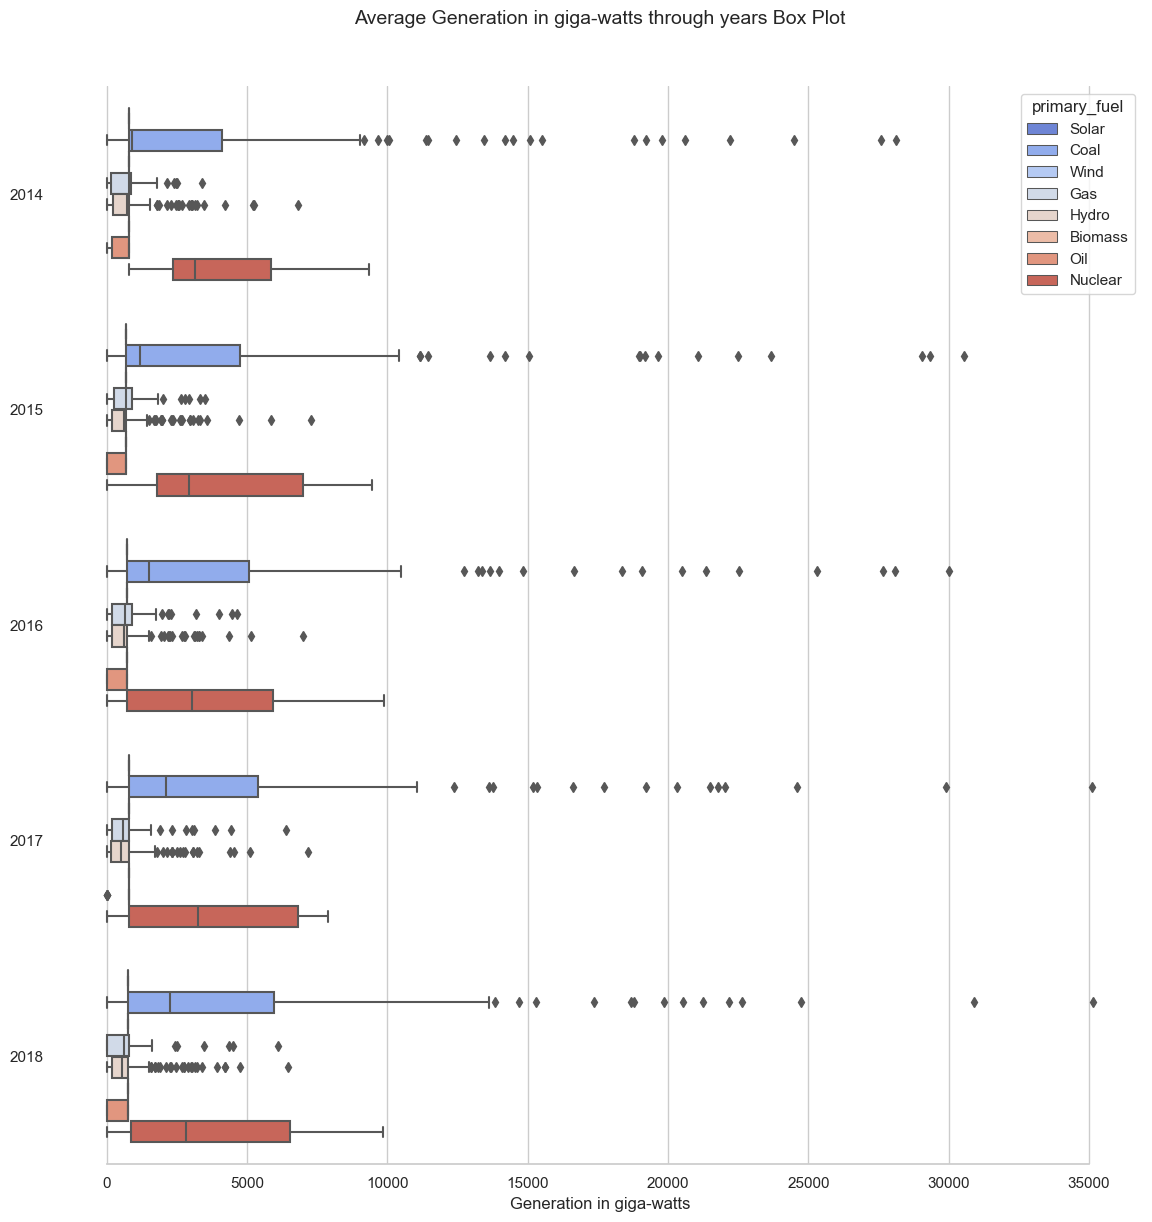

In [87]:
sns.set_theme(style="whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 14))

sns.boxplot(y='year', x='generation_gwh', hue='primary_fuel', data= df_generation_1c, palette='coolwarm')

# visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel='Generation in giga-watts')
sns.despine(trim=True, left=True)

plt.title('Average Generation in giga-watts through years Box Plot', size=14, y=1.05)
plt.show()

Above we can compare how over the years energy generation has varied according to the primary fuel. We can notice that it has been increasing organically, maintaining similar proportions. Highlighting the energy production of nuclear plants in 2018.

Next, in order to compare the average and total power generation through years we will group the data by year and primary fuel.

In [88]:
# Calculate the capacity and generation mean through the years by Primary Fuel
df_gen_by_year = df_generation_1c.groupby(['year','primary_fuel'], as_index=False).agg({'capacity_mw': 'mean', 
                                                                                        'generation_gwh': ['mean','sum']})
# Setting column names
df_gen_by_year.columns = ['year', 'primary_fuel', 'capacity_mw mean', 'generation_gwh mean', 'generation_gwh sum']

# Transform to ordered categories
order_cat = ['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil', 'Nuclear']
df_gen_by_year['primary_fuel'] = pd.Categorical(df_gen_by_year['primary_fuel'], categories=order_cat, ordered=True)

df_gen_by_year

,year,primary_fuel,capacity_mw mean,generation_gwh mean,generation_gwh sum
0,2014,Biomass,20.065200,801.123775,40056.188750
1,2014,Coal,809.957391,3312.397382,838036.537545
2,2014,Gas,366.875088,766.422544,52116.733007
3,2014,Hydro,195.542790,786.380465,183226.648345
4,2014,Nuclear,975.555556,3963.904522,35675.140700
5,2014,Oil,98.872941,508.812294,8649.809001
6,2014,Solar,20.565041,801.123775,98538.224325
7,2014,Wind,33.769907,801.123775,86521.367700
8,2015,Biomass,20.065200,711.181225,35559.061250
9,2015,Coal,809.957391,3470.460737,878026.566475


#### 1.4.2.4 Average Generation in giga-watts through years

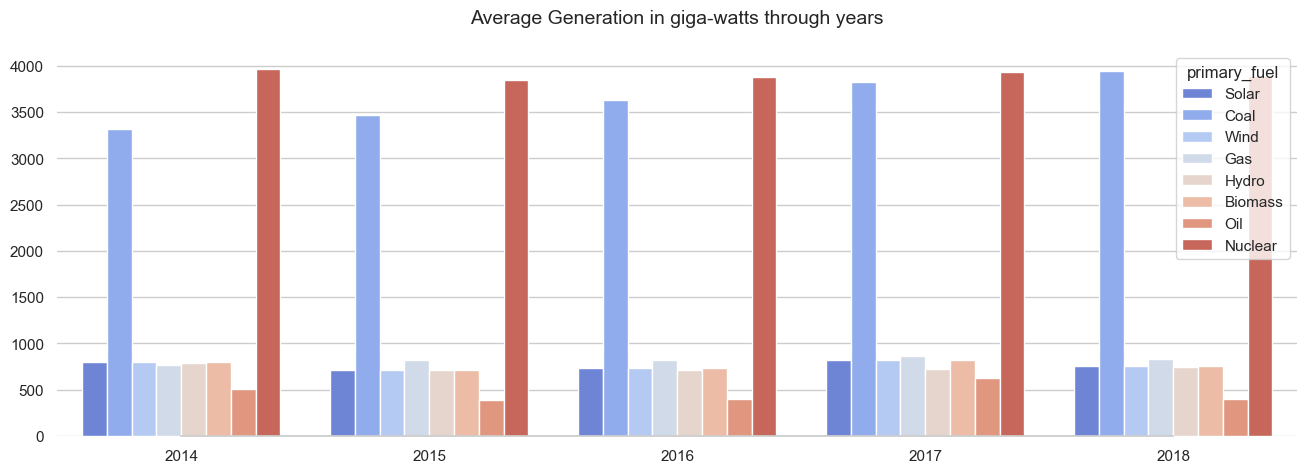

In [89]:
plt.figure(figsize=(16,5))
sns.barplot(x='year', y='generation_gwh mean', hue='primary_fuel', data= df_gen_by_year, palette='coolwarm')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.title('Average Generation in giga-watts through years', size=14, y=1.05)
plt.show()

#### 1.4.2.5 Total Generation in giga-watts through years

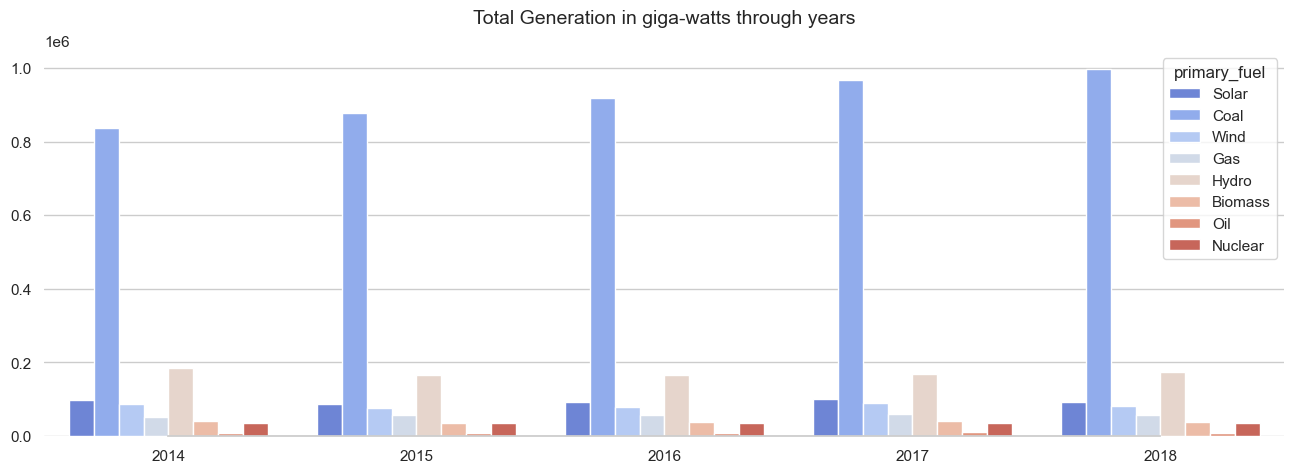

In [90]:
plt.figure(figsize=(16,5))
sns.barplot(x='year', y='generation_gwh sum', hue='primary_fuel', data= df_gen_by_year, palette='coolwarm')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.title('Total Generation in giga-watts through years', size=14, y=1.05)
plt.show()

#### 1.4.2.6  Plants location categorized by Primary Fuel

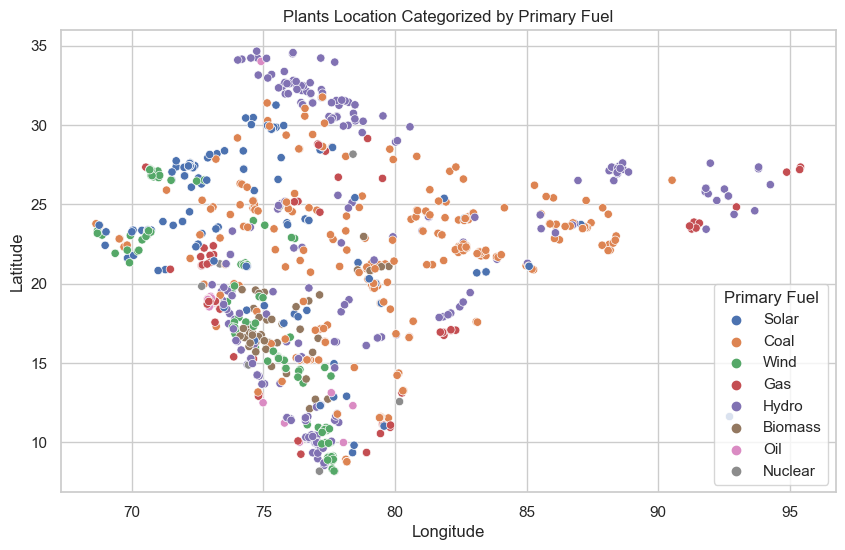

In [91]:
plt.figure(figsize=(10, 6))

# Map simulation with scatterplot
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=df)

# visual presentation
plt.legend(loc='lower right').set_title("Primary Fuel")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plants Location Categorized by Primary Fuel')
plt.show()


All the samples correspond to India. Above we simulate a map with the position of each plant categorized by the principal fuel.

### 1.4.3 Multivariate Analysis


#### 1.4.3.1 Pairplot

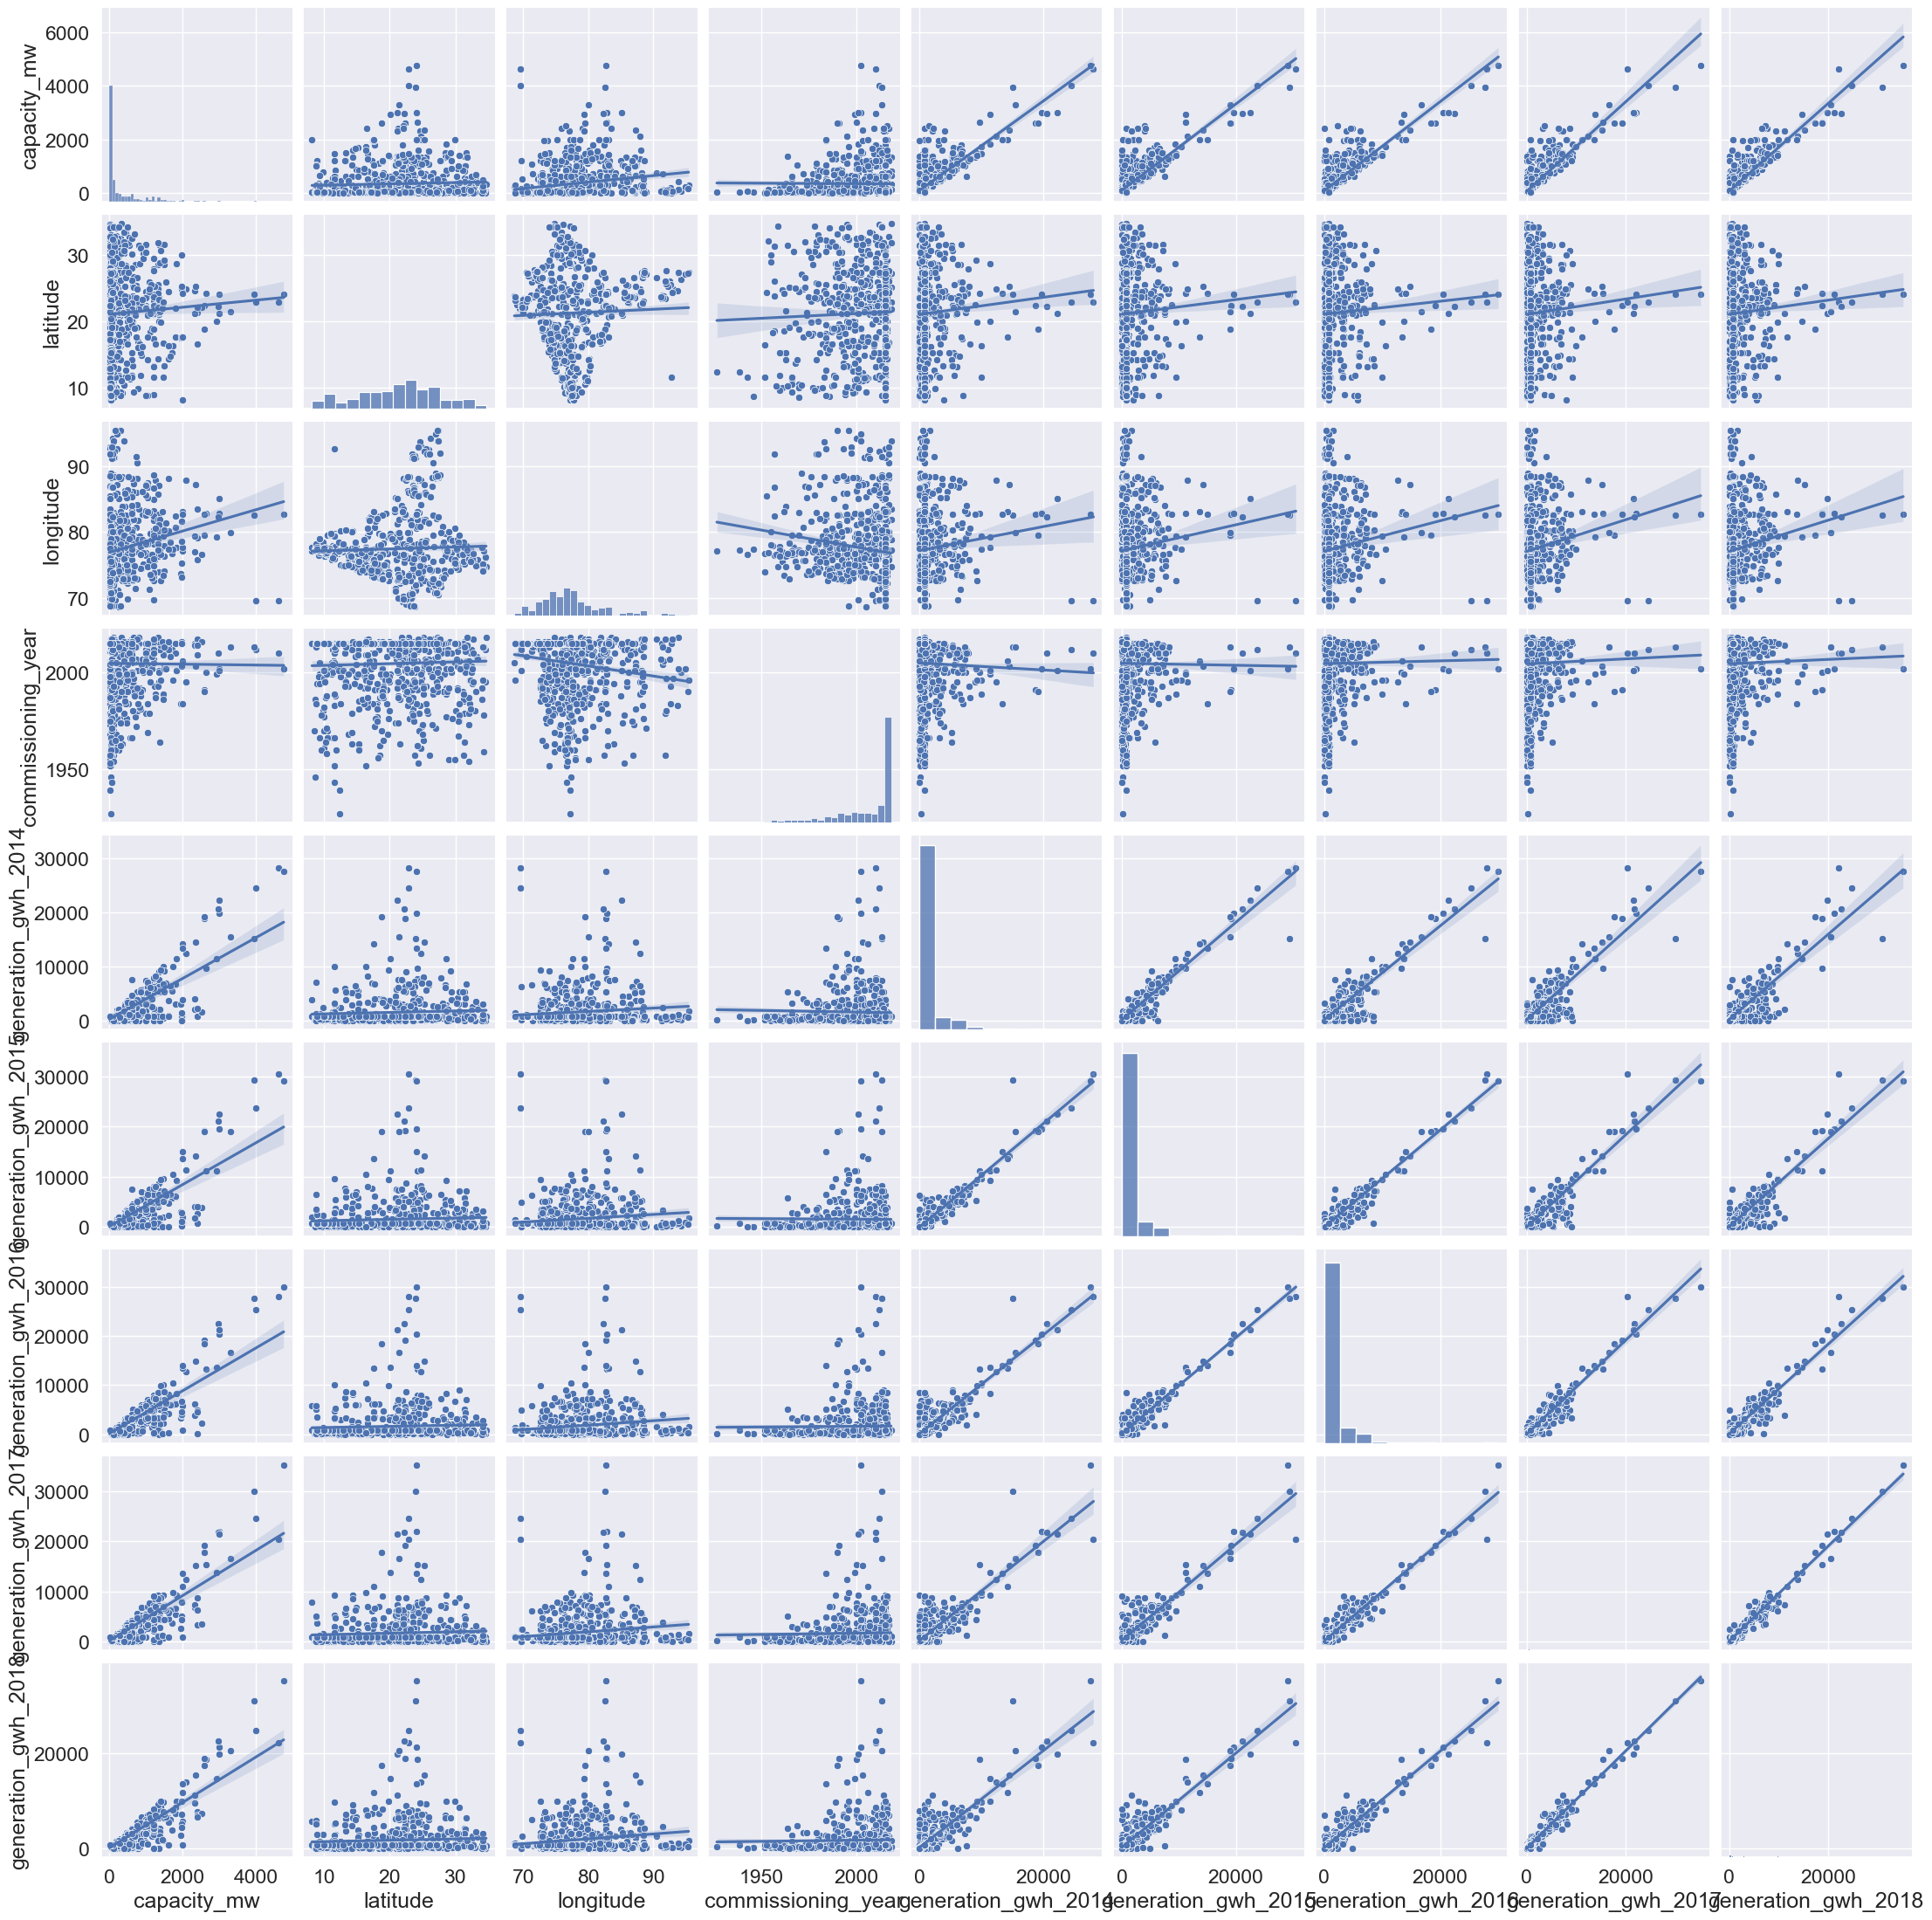

In [92]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

We can see that the capacity_mw variable has a strong positive relationship with the power generation variables which makes sense.

The generation_gwh variables have a positive relationship with each other. 

#### 1.4.3.2  Encoding categorical columns
In order to make the multivariate Analysis we need to encode the categorical features, for this purpose, we will use OrdinalEncoder.

<!-- df_backup5 = df.copy() -->

In [94]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
OE = OrdinalEncoder()

category_mappings = {}

for col in (categorical_col + ['primary_fuel']):
    # Fit and transform the column
    df[col] = OE.fit_transform(df[col].values.reshape(-1, 1))
    # Store the category mappings 
    category_mappings[col] = OE.categories_[0].tolist()

display(df.head())
display(df.tail())

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,126.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,2015.0,174.0,169.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,2015.0,21.0,196.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
902,1600.0,16.2949,77.3568,1.0,2016.0,22.0,58.0,2.0,801.123775,0.994875,233.59665,865.40000,686.500000
903,3.0,12.8932,78.1654,6.0,2015.0,77.0,22.0,0.0,801.123775,711.181225,737.20545,817.97725,751.644375
904,25.5,15.2758,75.5811,7.0,2015.0,21.0,246.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
905,80.0,24.3500,73.7477,1.0,2015.0,59.0,82.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375
906,16.5,9.9344,77.4768,7.0,2015.0,21.0,234.0,2.0,801.123775,711.181225,737.20545,817.97725,751.644375


We have converted the categorical columns into numerical columns using Ordinal Encoder method. We save the categories for use later.

#### 1.4.3.3 Correlation between AveragePrice and Region with independent variables

In [95]:
# Calculate the correlation between features
cor = df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,-0.378447,-0.008775,-0.254236,-0.244415,0.216595,0.793430,0.819698,0.852897,0.868406,0.884890
latitude,0.051309,1.000000,0.036362,-0.010530,0.035691,0.056528,-0.136152,-0.185045,0.058735,0.054006,0.047807,0.058068,0.055383
longitude,0.197129,0.036362,1.000000,-0.359060,-0.164425,-0.241907,-0.315740,0.253397,0.104902,0.121821,0.143852,0.152159,0.155534
primary_fuel,-0.378447,-0.010530,-0.359060,1.000000,0.155931,0.060286,0.567925,-0.512705,-0.240974,-0.249509,-0.259576,-0.264235,-0.271626
commissioning_year,-0.008775,0.035691,-0.164425,0.155931,1.000000,0.330241,0.335440,-0.268750,-0.033371,-0.009985,0.014325,0.025804,0.023585
source,-0.254236,0.056528,-0.241907,0.060286,0.330241,1.000000,0.180698,-0.506295,-0.132891,-0.138336,-0.142056,-0.142419,-0.148834
url,-0.244415,-0.136152,-0.315740,0.567925,0.335440,0.180698,1.000000,-0.030389,-0.134736,-0.140257,-0.144029,-0.144397,-0.150901
geolocation_source,0.216595,-0.185045,0.253397,-0.512705,-0.268750,-0.506295,-0.030389,1.000000,0.108115,0.112545,0.115571,0.115867,0.121086
generation_gwh_2014,0.793430,0.058735,0.104902,-0.240974,-0.033371,-0.132891,-0.134736,0.108115,1.000000,0.963606,0.935084,0.903841,0.894896
generation_gwh_2015,0.819698,0.054006,0.121821,-0.249509,-0.009985,-0.138336,-0.140257,0.112545,0.963606,1.000000,0.973400,0.940199,0.933091


In [96]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'capacity_mw') &  (corr_df['Feature B'] != 'capacity_mw')]

,Feature A,Feature B,Corr coef
34,capacity_mw,generation_gwh_2018,0.884890
36,capacity_mw,generation_gwh_2017,0.868406
37,capacity_mw,generation_gwh_2016,0.852897
39,capacity_mw,generation_gwh_2015,0.819698
42,capacity_mw,generation_gwh_2014,0.793430
52,capacity_mw,geolocation_source,0.216595
53,capacity_mw,longitude,0.197129
91,capacity_mw,latitude,0.051309
106,capacity_mw,commissioning_year,-0.008775
146,capacity_mw,url,-0.244415


Here is the list of the correlation coefficients with the target variable capacity_mw. 
There is a strong positive relation between the target variable capacity_mw and the generation_gwh columns, a weak positive relation with geolocation_source and longitude, and a negative medium correlation with primary_fuel.

In [97]:
# Listing the correlation coeficients with the target variable (Classification model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'primary_fuel') & (corr_df['Feature B'] != 'primary_fuel')]

,Feature A,Feature B,Corr coef
44,primary_fuel,url,0.567925
58,primary_fuel,commissioning_year,0.155931
80,primary_fuel,source,0.060286
110,primary_fuel,latitude,-0.010530
142,primary_fuel,generation_gwh_2014,-0.240974
148,primary_fuel,generation_gwh_2015,-0.249509
152,primary_fuel,generation_gwh_2016,-0.259576
153,primary_fuel,generation_gwh_2017,-0.264235
157,primary_fuel,generation_gwh_2018,-0.271626
161,primary_fuel,longitude,-0.359060


The primary_fuel variable has a medium positive correlation with url, and a weak one with commissioning_year. Also, is negatively correlated with geolocation_source, capacity_mw, and longitude.

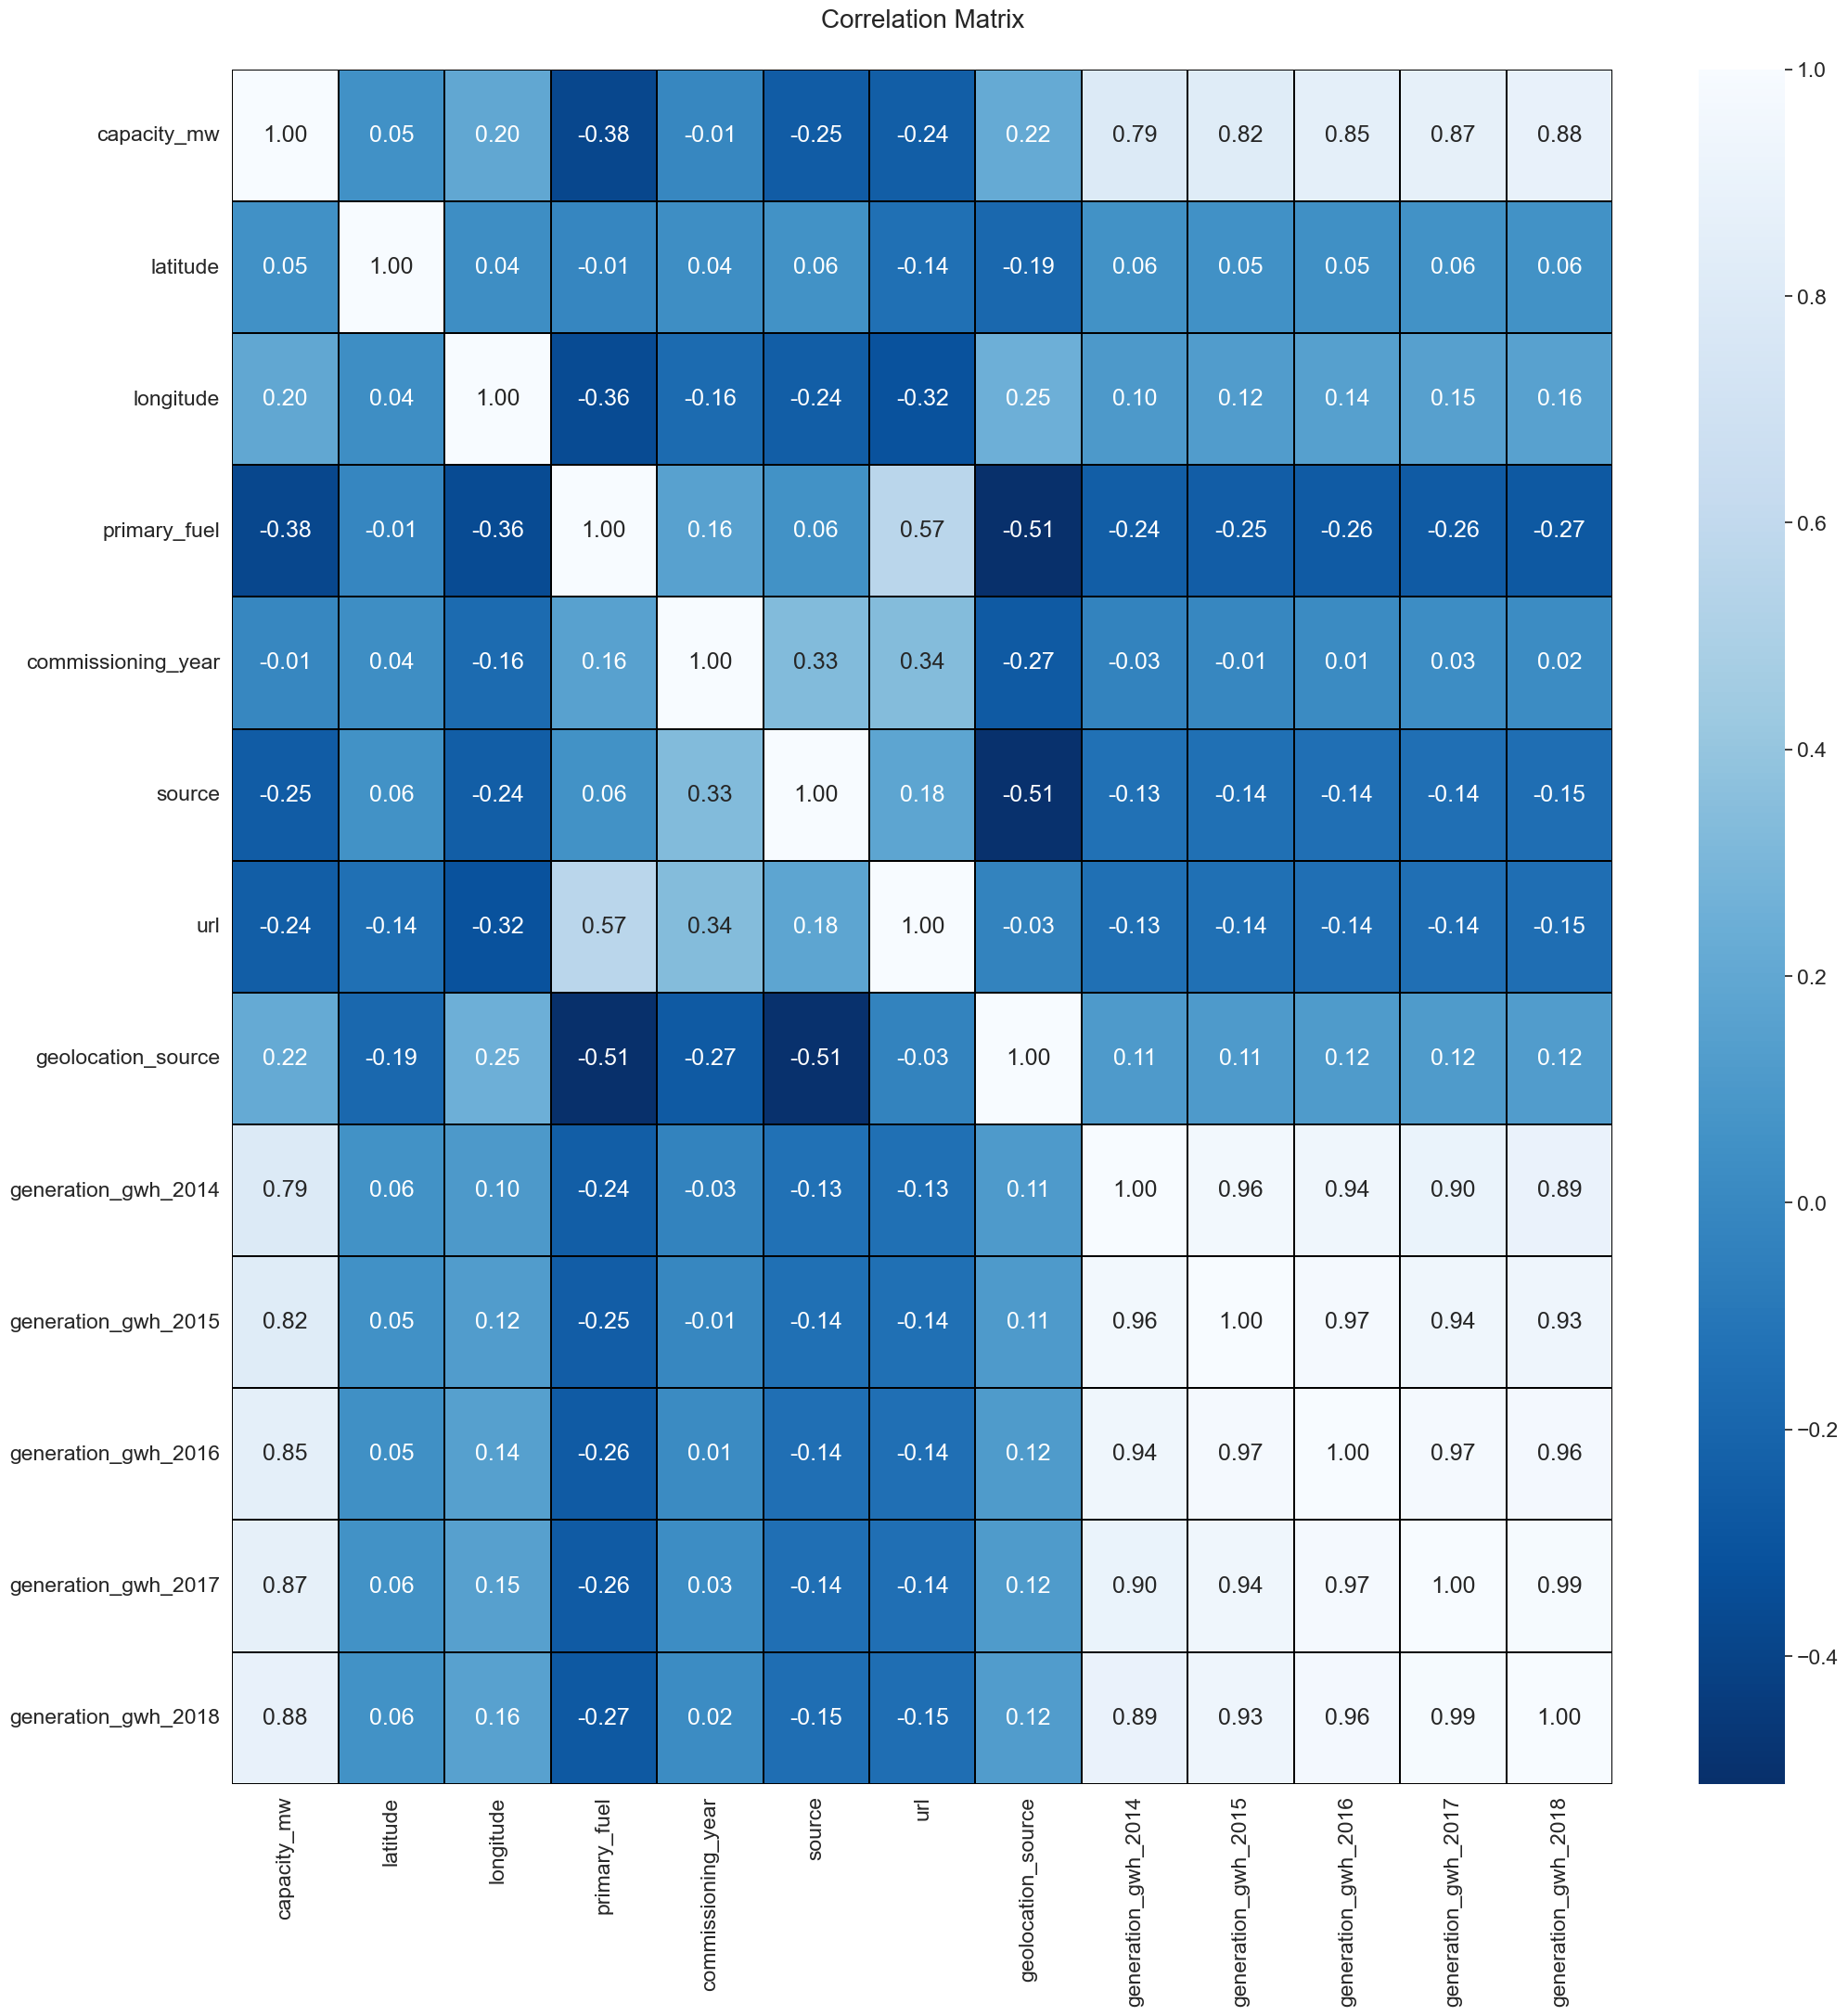

In [98]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

This heatmap shows the correlation matrix. We can observe the relationship between feature-to-feature and feature-to-label.

- This heatmap contains both positive and negative correlations.
- The capacity_mw feature has more correlation with the power generation columns(+0.88) and is negatively correlated with primary_fuel column(-0.38)
- The primary_fuel feature is slightly correlated with geolocation_source(-0.51) and url(+0.57).
- The columns 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018' are highly correlated with each other.

# 2. Preprocessing Data
## 2.1 Missing values
In Sections 1.2 and 1.3.2 we manage the missing values in the the dataset.

In [99]:
df.isnull().sum().sum()

0

No missing values to remove.

## 2.2  Removing outliers

<!-- df_backup6 = df.copy() -->

In [102]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.561750,1.120269,0.855718,1.261806,0.407562,1.420779,0.534283,1.039322,0.266079,0.276982,0.284430,0.285157,0.298002
1,0.402975,0.572224,0.578535,0.943665,0.663795,2.855426,1.192348,0.406326,0.266079,0.276982,0.284430,0.285157,0.298002
2,0.500734,0.113195,1.639177,1.702901,0.663795,0.521513,1.605551,0.406326,0.266079,0.276982,0.284430,0.285157,0.298002
3,0.341461,0.428686,2.814837,0.502571,0.040846,0.499441,0.506377,0.406326,0.330394,0.233578,0.236028,0.334639,0.336698
4,2.426707,0.122255,1.001569,0.943665,0.663795,0.499441,0.506377,0.406326,0.517769,1.427261,1.506540,1.180562,1.716157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.094194,0.786246,0.021900,0.943665,0.727854,0.499441,0.506377,0.406326,0.266079,0.509506,0.448248,0.269939,0.318104
903,0.560919,1.331741,0.141902,1.261806,0.663795,0.714491,1.057315,2.484971,0.266079,0.276982,0.284430,0.285157,0.298002
904,0.523511,0.949668,0.381612,1.702901,0.663795,0.521513,2.370742,0.406326,0.266079,0.276982,0.284430,0.285157,0.298002
905,0.432902,0.505466,0.753013,0.943665,0.663795,0.317204,0.139085,0.406326,0.266079,0.276982,0.284430,0.285157,0.298002


In [103]:
# threshold = 3.2
df_new = df[(z<3.2).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df


39 rows with outliers were deleted.
This represent 4.53% of the data.
In the new dataset there are 822 rows and 13 columns.


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,126.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1.0,2015.0,174.0,169.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7.0,2015.0,21.0,196.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,58.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,58.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1.0,2016.0,22.0,58.0,2.0,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6.0,2015.0,77.0,22.0,0.0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7.0,2015.0,21.0,246.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1.0,2015.0,59.0,82.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375


Since our dataset is small threshold was defined as 3.2 instead of 3. Therefore only 4.53% of the data was lost.

## 2.4 Skewness Correction

We will modify the columns' names for a better approach.

In [104]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
generation_gwh_2014,2.967593
generation_gwh_2015,2.778447
generation_gwh_2016,2.721960
generation_gwh_2018,2.612044
generation_gwh_2017,2.578939
capacity_mw,1.939367
source,1.710468
url,1.445080
longitude,1.048897
primary_fuel,0.452163


We are going to select which features have a skew greater than 0.5 and apply transform methods to those features in order to eliminate the skewness.

In [105]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['capacity_mw',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'longitude',
 'source',
 'url']

In [106]:
# The categorical variables will not be taken into account, nor longitude.
skew_columns.remove('source')
skew_columns.remove('url')
skew_columns.remove('longitude')

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [107]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

We will select the best transformation method looking for the minimum absolute value of skewness.

In [108]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for 
display(df_comp[df_comp['feature'] == 'generation_gwh_2018'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

,index,Skewness,feature,Skewness_abs
0,generation_gwh_2018_sqrt,1.413233,generation_gwh_2018,1.413233
1,generation_gwh_2018_log,NaN,generation_gwh_2018,NaN
2,generation_gwh_2018_cbrt,0.444969,generation_gwh_2018,0.444969


,index,Skewness,feature,Skewness_abs
23,capacity_mw,1.939367,capacity,1.939367
22,capacity_mw_cbrt,0.810477,capacity_mw,0.810477
7,generation_gwh_2017,2.578939,generation_gwh,2.578939
18,generation_gwh_2014_cbrt,0.436373,generation_gwh_2014,0.436373
14,generation_gwh_2015_cbrt,0.548535,generation_gwh_2015,0.548535
10,generation_gwh_2016_cbrt,0.521326,generation_gwh_2016,0.521326
6,generation_gwh_2017_cbrt,0.377501,generation_gwh_2017,0.377501
2,generation_gwh_2018_cbrt,0.444969,generation_gwh_2018,0.444969


For each skewness column, we obtain the better transform method. We can observe that for columns capacity_mw, generation_gwh_2014,  generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018 is better to apply the cube-root transform method.
<!-- For longitude we will apply the log transform method. -->

In [109]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df[col] = np.cbrt(df[col])

['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [110]:
# Transform the capacity_mw column
df['capacity_mw_cat'] = np.cbrt(df['capacity_mw'])

The transformation to the capacity mw column will be stored in a different column in order to only be considered in the classification model since this is the target variable in the regression model.

In [111]:
# This is the new skewness for the transformed columns
skew_columns.remove('capacity_mw')
skew_columns = skew_columns + ['capacity_mw_cat']
df[skew_columns].skew()

generation_gwh_2014    0.436373
generation_gwh_2015    0.548535
generation_gwh_2016    0.521326
generation_gwh_2017    0.377501
generation_gwh_2018    0.444969
capacity_mw_cat        0.810477
dtype: float64

After update the df dataset with the transform data with cube-root method, we can continue with the analysis.

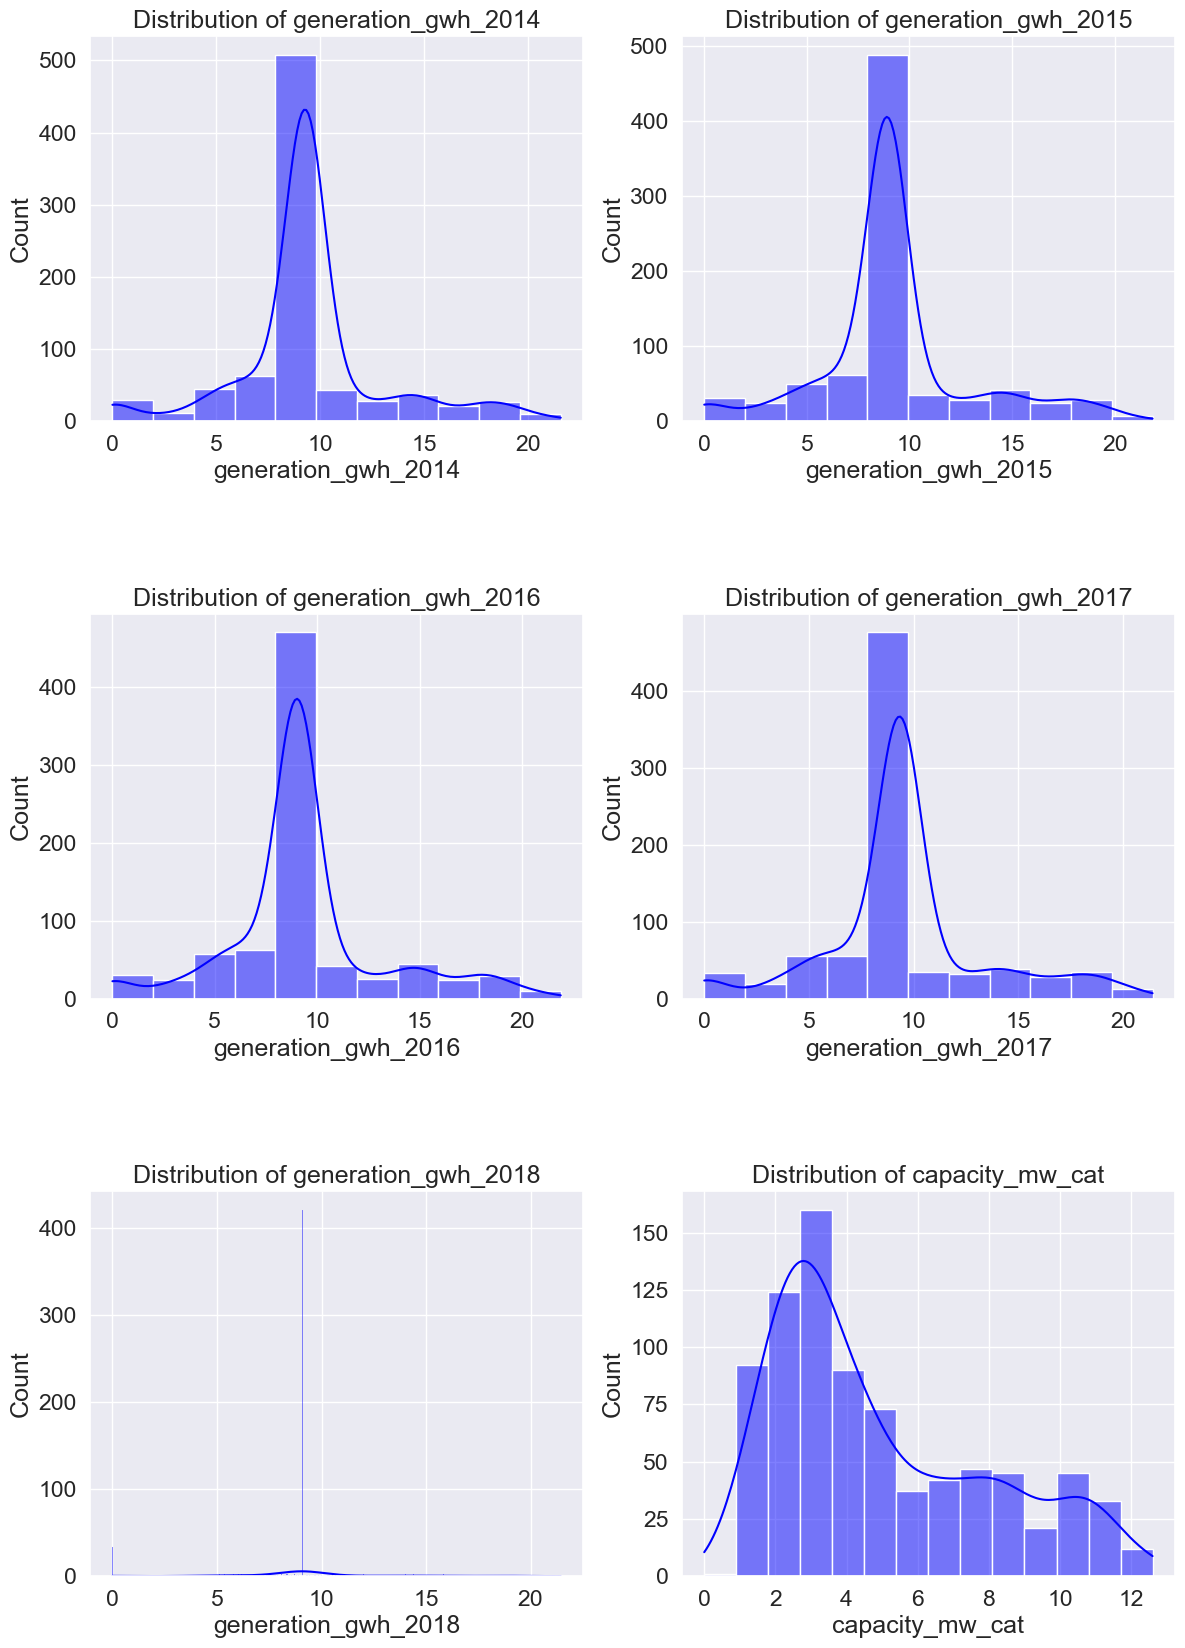

In [112]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(3, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='blue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.5 Feature Scaling using Standard Scalarization

### 2.5.1 Separating features and label
#### 2.5.1.1 Separating features for regression model to predict capacity in mega-watts

In [113]:
# Separating the independent and target variables into x and y 
col = ['capacity_mw', 'capacity_mw_cat'] #capacity_mw_cat variable -> classification model
x = df.drop(col, axis=1)
y = df['capacity_mw']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (822, 12)
Label Dimension = (822,)


,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,6.0,2011.0,109.0,126.0,1.0,9.287522,8.926066,9.033641,9.352199,9.092238
1,24.7663,74.6090,1.0,2015.0,174.0,169.0,2.0,9.287522,8.926066,9.033641,9.352199,9.092238
2,21.9038,69.3732,7.0,2015.0,21.0,196.0,2.0,9.287522,8.926066,9.033641,9.352199,9.092238
3,23.8712,91.3602,2.0,2004.0,22.0,58.0,2.0,8.516872,9.449397,9.604586,8.723154,8.555526
4,21.9603,82.4091,1.0,2015.0,22.0,58.0,2.0,14.479241,18.086385,18.413278,17.528476,19.380155


0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

#### 2.5.1.2 Separating features for classification model to predict Primary fuel

In [114]:
# Separating the independent and target variables into x and y 
col = ['primary_fuel', 'capacity_mw'] #capacity_mw is represented by capacity_mw_cat
x2 = df.drop(col, axis=1)
y2 = df['primary_fuel']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (822, 12)
Label Dimension = (822,)


,latitude,longitude,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,capacity_mw_cat
0,28.1839,73.2407,2011.0,109.0,126.0,1.0,9.287522,8.926066,9.033641,9.352199,9.092238,1.357209
1,24.7663,74.6090,2015.0,174.0,169.0,2.0,9.287522,8.926066,9.033641,9.352199,9.092238,4.610436
2,21.9038,69.3732,2015.0,21.0,196.0,2.0,9.287522,8.926066,9.033641,9.352199,9.092238,3.396999
3,23.8712,91.3602,2004.0,22.0,58.0,2.0,8.516872,9.449397,9.604586,8.723154,8.555526,5.129928
4,21.9603,82.4091,2015.0,22.0,58.0,2.0,14.479241,18.086385,18.413278,17.528476,19.380155,12.164404


array([6., 1., 7., 2., 3., 0., 5., 4.])

### 2.5.2 Scaling
### 2.5.2.1 Scaling the data for regression model

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model {'*'*30}")
display(x.head())



****************************** x features for regression model ******************************


,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.116903,-0.851090,1.219893,0.391419,1.385734,0.502204,-1.000601,-0.060972,-0.087240,-0.085355,-0.061708,-0.090535
1,0.572628,-0.559955,-0.965704,0.663049,2.804147,1.149033,0.417492,-0.060972,-0.087240,-0.085355,-0.061708,-0.090535
2,0.116756,-1.673983,1.657013,0.663049,-0.534580,1.555181,0.417492,-0.060972,-0.087240,-0.085355,-0.061708,-0.090535
3,0.430077,3.004218,-0.528585,-0.083934,-0.512758,-0.520687,0.417492,-0.276639,0.052473,0.063696,-0.222945,-0.224969
4,0.125754,1.099682,-0.965704,0.663049,-0.512758,-0.520687,0.417492,1.391936,2.358274,2.363299,2.034036,2.486367


### 2.5.2.2 Scaling the data for classification model

In [116]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for classification model {'*'*30}")
display(x2.head())



****************************** x2 features for classification model ******************************


,latitude,longitude,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,capacity_mw_cat
0,1.116903,-0.851090,0.391419,1.385734,0.502204,-1.000601,-0.060972,-0.087240,-0.085355,-0.061708,-0.090535,-1.179511
1,0.572628,-0.559955,0.663049,2.804147,1.149033,0.417492,-0.060972,-0.087240,-0.085355,-0.061708,-0.090535,-0.101496
2,0.116756,-1.673983,0.663049,-0.534580,1.555181,0.417492,-0.060972,-0.087240,-0.085355,-0.061708,-0.090535,-0.503590
3,0.430077,3.004218,-0.083934,-0.512758,-0.520687,0.417492,-0.276639,0.052473,0.063696,-0.222945,-0.224969,0.070647
4,0.125754,1.099682,0.663049,-0.512758,-0.520687,0.417492,1.391936,2.358274,2.363299,2.034036,2.486367,2.401646


## 2.6 Muticollinearity Analysis and Feature Selection


### 2.6.1 Checking Variance Inflation Factor (VIF)

#### 2.6.1.1 Checking VIF for regression model (AveragePrice)

In [117]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
9,generation_gwh_2016,12.018421
10,generation_gwh_2017,10.204765
11,generation_gwh_2018,9.568766
8,generation_gwh_2015,6.983796
7,generation_gwh_2014,3.684794
2,primary_fuel,3.671032
6,geolocation_source,3.294658
5,url,2.681991
4,source,2.053721
3,commissioning_year,1.388439


By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features:  
- generation_gwh_2016
- generation_gwh_2017
have VIF value greater than 10 which means they have high correlation with each other. 

We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.


In [118]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'capacity_mw') & (corr_df['Feature B'].isin(['generation_gwh_2016', 'generation_gwh_2017'])) ]

,Feature A,Feature B,Corr coef
36,capacity_mw,generation_gwh_2017,0.868406
37,capacity_mw,generation_gwh_2016,0.852897


<!-- # Saving a backup of x
x_backup = x.copy() -->

In [120]:
# Dropping the columns with multicollinearity
x = x.drop(['generation_gwh_2016'], axis=1) 

We drop the column 'generation_gwh_2016' to solve the multicollinearity problem since is less correlated with the target than generation_gwh_2017.

In [121]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
10,generation_gwh_2018,8.962801
9,generation_gwh_2017,8.827324
8,generation_gwh_2015,4.693430
7,generation_gwh_2014,3.684242
2,primary_fuel,3.667161
6,geolocation_source,3.293785
5,url,2.681559
4,source,2.051045
3,commissioning_year,1.367804
1,longitude,1.248896


Dropping the generation_gwh_2016 column solved the multicollinearity issue. We can now move ahead with model building. 

## 2.7 Balancing the Dataset for Classification model
The dataset is imbalance. So, we are going to apply SMOTE for oversampling the data.

In [122]:
# Count the frequencies of target
target_counts = y2.value_counts().to_frame()
target_counts

,primary_fuel
1.0,230
3.0,221
6.0,123
7.0,108
2.0,65
0.0,49
5.0,17
4.0,9


In [123]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x2, y2)

In [124]:
# Count the frequencies of target
target_counts = y1.value_counts().to_frame()
target_counts

,primary_fuel
6.0,230
1.0,230
7.0,230
2.0,230
3.0,230
0.0,230
5.0,230
4.0,230


In [125]:
# Setting X and Y for the classification model
X = x1
Y = y1

Since the data is balanced, we can build machine learning classification models. Section 4

# 3. Modeling for predicting AveragePrice

In [126]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## 3.1 Finding the best random state

In [127]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
#         print(f"{i}: acc = {acc}")
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [128]:
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.6782 at random_state 5


Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 3.2 Creating train test split

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (575, 11)
x_test shape:   (247, 11)
y_train shape:  (575,)
y_test shape:   (247,)


## 3.3 Regression Algoritms

In [130]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [131]:
eval_model

,id,Model,RMSE,R2_Score(test),CV_Mean


### 3.3.1 Linear Regression

In [132]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [  -3.57494383    7.93801065 -119.38279034   25.33574928 -123.68830431
  -26.27245318  -23.81410089    4.32690454   44.95703322   78.68547364
  108.43514141]

LR intercept_ : 279.64905880506717
LR score train  : 0.5105949413935515
LR score test   : 0.6782349347043766
********** E R R O R **********
Mean squared error: 63679.2252
Root Mean squared error: 252.3474
Cross-validation results (R2): [ 0.62422589  0.31388798 -0.05754497  0.70051232  0.44778804  0.50597737
  0.6228303   0.54352963  0.58251909  0.59477872]
Average R2: 0.4879
R2_Score(test): 0.6782


### 3.3.2 Random Forest Regressor

In [133]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

Wall time: 26 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=5)

In [134]:
random_search.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=110)

In [135]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

Best parameters : {'n_estimators': 110, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 30, 'bootstrap': True}
Best score : 0.7572196735373851
Best Estimator:  RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=110)
********** E R R O R **********
Mean squared error: 26137.1421
Root Mean squared error: 161.6699
Cross-validation results (R2): 0.7572196735373851
Average R2: 0.7572
R2_Score(test): 0.8679


### 3.3.3 Decision Tree Regressor

In [136]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 94866.8835
Root Mean squared error: 308.0047
Cross-validation results (R2): [0.61969385 0.53743375 0.59752498 0.66749757 0.61049817]
Average R2: 0.6065
R2_Score(test): 0.5206


### 3.3.4 K Neighbors Regressor

In [137]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 32423.8697
Root Mean squared error: 180.0663
Cross-validation results (R2): [0.74297304 0.82634177 0.67316657 0.76584837 0.7098125 ]
Average R2: 0.7436
R2_Score(test): 0.8362


### 3.3.5 Gradient Boosting Regressor

In [138]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 52469.2038
Root Mean squared error: 229.0616
Cross-validation results (R2): [0.73374123 0.83359571 0.69666825 0.71184528 0.74103776]
Average R2: 0.7434
R2_Score(test): 0.7349
Wall time: 1.43 s


### 3.3.6 Lasso

In [139]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 63613.5980
Root Mean squared error: 252.2174
Cross-validation results (R2): [0.48294099 0.53462772 0.47920633 0.60398659 0.58240579]
Average R2: 0.5366
R2_Score(test): 0.6786
Wall time: 71.9 ms


### 3.3.7 Ridge

In [140]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 63664.1266
Root Mean squared error: 252.3175
Cross-validation results (R2): [0.47222755 0.5337627  0.47901402 0.60480714 0.58020866]
Average R2: 0.5340
R2_Score(test): 0.6783
Wall time: 76.1 ms


### 3.3.8 Support Vector Regressor

In [141]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 224870.4159
Root Mean squared error: 474.2050
Cross-validation results (R2): [-0.10845838 -0.10061165 -0.16381788 -0.18145969 -0.15799779]
Average R2: -0.1425
R2_Score(test): -0.1362
Wall time: 505 ms


In [142]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

,id,Model,RMSE,R2_Score(test),CV_Mean,Dif_R2_CVmean
1,Random Forest Regressor,"(DecisionTreeRegressor(max_depth=30, max_featu...",161.669855,0.867932,0.757220,0.110712
3,K Neighbors Regressor,KNeighborsRegressor(),180.066293,0.836165,0.743628,0.092537
4,Gradient Boosting Regressor,([DecisionTreeRegressor(criterion='friedman_ms...,229.061572,0.734878,0.743378,-0.008500
2,Decision Tree Regressor,DecisionTreeRegressor(random_state=5),308.004681,0.520647,0.606530,-0.085883
5,Lasso,Lasso(),252.217363,0.678567,0.536633,0.141933
6,Ridge,Ridge(),252.317511,0.678311,0.534004,0.144307
0,LinearRegression,LinearRegression(),252.347429,0.678235,0.487850,0.190384
7,SVR,SVR(),474.205036,-0.136249,-0.142469,0.006220


From the summary of models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

## 3.4 Hyper Parameter Tuning
### 3.4.1 Finding the best parameters for Linear Regression

In [143]:
random_state

5

In [144]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

Wall time: 7.4 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=5, scoring='neg_mean_squared_error')

In [145]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 110,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 30,
 'bootstrap': True}

These are the best parameters for training the model.

In [146]:
best_model

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=110)

## 3.5 Final Model

In [147]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=110)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 86.81%


### 3.6.1 Saving the model

In [148]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/capacitymw_regressor_model.pkl")

['models/capacitymw_regressor_model.pkl']

### 3.6.2  Predicting the saved model

In [149]:
# Lets load the saved model and get the predictions
model = joblib.load("models/capacitymw_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 86.809 %


,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
Predicted,514.542361,20.073374,31.19249,266.411543,6.598955,18.859105,1237.534907,58.267317,76.430366,205.964674,...,63.725129,23.112847,1363.221342,1375.846101,300.730312,20.243733,11.093238,795.559052,96.45986,208.132329
Original,412.020000,16.000000,10.00000,96.000000,40.000000,3.000000,1200.000000,10.500000,140.000000,240.000000,...,45.000000,11.200000,1240.000000,1980.000000,388.500000,20.000000,5.000000,422.000000,55.00000,101.000000


These are the predicted values in a dataset to compared the prediction with the test data with R2 score 86.81%. 

# 4. Modeling for predicting region

## 4.1 Finding the best random state

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [151]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9511 at random_state 63
Wall time: 1min 22s


Best accuracy is 95.11% at random_state 63

## 4.2 Creating train test split

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (1288, 12)
x_test shape:   (552, 12)
y_train shape:  (1288,)
y_test shape:   (552,)


## 4.3 Classification Algorithms¶

In [153]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score

In [154]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [155]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred_dict = {}
    

### 4.3.1 RandomForestClassifier

In [156]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[64  1  0  0  0  0  0  0]
 [ 4 44  3  4  1  1  0  0]
 [ 2  4 78  0  0  1  0  0]
 [ 0  4  1 69  0  0  0  0]
 [ 0  0  0  1 70  0  0  0]
 [ 0  1  0  0  0 59  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        65
         1.0       0.81      0.77      0.79        57
         2.0       0.95      0.92      0.93        85
         3.0       0.93      0.93      0.93        74
         4.0       0.99      0.99      0.99        71
         5.0       0.97      0.98      0.98        60
         6.0       1.00      1.00      1.00        67
         7.0       1.00      1.00      1.00        73

    accuracy                           0.95       552
   macro avg       0.95      0.95      0.95       552
weighted avg       0.95      0.95      0.95       552

Training Accuracy using RandomForestClassifier is 100.00

### 4.3.2 Extra Trees Classifier

In [157]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[64  1  0  0  0  0  0  0]
 [ 4 46  5  1  1  0  0  0]
 [ 1  3 80  0  0  1  0  0]
 [ 0  2  1 71  0  0  0  0]
 [ 0  1  0  1 69  0  0  0]
 [ 0  0  0  0  0 60  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        65
         1.0       0.87      0.81      0.84        57
         2.0       0.93      0.94      0.94        85
         3.0       0.97      0.96      0.97        74
         4.0       0.99      0.97      0.98        71
         5.0       0.98      1.00      0.99        60
         6.0       1.00      1.00      1.00        67
         7.0       1.00      1.00      1.00        73

    accuracy                           0.96       552
   macro avg       0.96      0.96      0.96       552
weighted avg       0.96      0.96      0.96       552

Training Accuracy using ExtraTreesClassifier is 100.00%
Th

### 4.3.3 Logistic Regression

In [158]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[62  0  0  0  0  2  0  1]
 [ 8 30  3  7  8  0  0  1]
 [ 1 11 29 27  4 13  0  0]
 [ 3 10  2 54  2  3  0  0]
 [ 0  3  0  9 59  0  0  0]
 [ 2  5  0  2  0 49  0  2]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        65
         1.0       0.51      0.53      0.52        57
         2.0       0.85      0.34      0.49        85
         3.0       0.55      0.73      0.62        74
         4.0       0.81      0.83      0.82        71
         5.0       0.73      0.82      0.77        60
         6.0       1.00      1.00      1.00        67
         7.0       0.95      1.00      0.97        73

    accuracy                           0.77       552
   macro avg       0.78      0.77      0.76       552
weighted avg       0.78      0.77      0.76       552

Training Accuracy using LogisticRegression is 78.65%
The acc

### 4.3.4 Support Vector Machine Classifier

In [159]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: SVC
Confusion matrix: 
 [[63  0  0  0  0  1  0  1]
 [ 6 38  4  3  5  0  0  1]
 [ 1  5 59 10  1  8  0  1]
 [ 2  4  4 63  1  0  0  0]
 [ 0  0  0  1 70  0  0  0]
 [ 5  2  0  1  0 50  0  2]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        65
         1.0       0.78      0.67      0.72        57
         2.0       0.88      0.69      0.78        85
         3.0       0.81      0.85      0.83        74
         4.0       0.91      0.99      0.95        71
         5.0       0.85      0.83      0.84        60
         6.0       1.00      1.00      1.00        67
         7.0       0.94      1.00      0.97        73

    accuracy                           0.88       552
   macro avg       0.87      0.88      0.87       552
weighted avg       0.87      0.88      0.87       552

Training Accuracy using SVC is 88.04%
The accuracy score using SVC is 87.5%

### 4.3.5 Gradient Boosting Classifier

In [160]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[64  1  0  0  0  0  0  0]
 [ 4 47  2  3  1  0  0  0]
 [ 2  4 74  2  1  2  0  0]
 [ 0  3  3 67  1  0  0  0]
 [ 0  1  0  1 69  0  0  0]
 [ 0  2  2  1  0 55  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        65
         1.0       0.81      0.82      0.82        57
         2.0       0.91      0.87      0.89        85
         3.0       0.91      0.91      0.91        74
         4.0       0.96      0.97      0.97        71
         5.0       0.96      0.92      0.94        60
         6.0       1.00      1.00      1.00        67
         7.0       1.00      1.00      1.00        73

    accuracy                           0.93       552
   macro avg       0.93      0.93      0.93       552
weighted avg       0.94      0.93      0.93       552

Training Accuracy using GradientBoostingClassifier i

### 4.3.6 AdaBoost Classifier

In [161]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[ 0 63  0  0  0  0  0  2]
 [ 0 51  0  0  0  0  0  6]
 [ 0 85  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        65
         1.0       0.13      0.89      0.22        57
         2.0       0.00      0.00      0.00        85
         3.0       0.00      0.00      0.00        74
         4.0       0.00      0.00      0.00        71
         5.0       0.00      0.00      0.00        60
         6.0       1.00      1.00      1.00        67
         7.0       0.89      1.00      0.94        73

    accuracy                           0.35       552
   macro avg       0.25      0.36      0.27       552
weighted avg       0.25      0.35      0.27       552

Training Accuracy using AdaBoostClassifier is 37.73%
The acc

### 4.3.7 Bagging Classifier

In [162]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[63  2  0  0  0  0  0  0]
 [ 3 48  2  3  0  1  0  0]
 [ 2  5 75  3  0  0  0  0]
 [ 0  5  2 67  0  0  0  0]
 [ 0  0  0  1 70  0  0  0]
 [ 0  2  1  0  0 57  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        65
         1.0       0.77      0.84      0.81        57
         2.0       0.94      0.88      0.91        85
         3.0       0.91      0.91      0.91        74
         4.0       1.00      0.99      0.99        71
         5.0       0.98      0.95      0.97        60
         6.0       1.00      1.00      1.00        67
         7.0       1.00      1.00      1.00        73

    accuracy                           0.94       552
   macro avg       0.94      0.94      0.94       552
weighted avg       0.94      0.94      0.94       552

Training Accuracy using BaggingClassifier is 99.69%
The accur

## 4.4 Comparing models
### 4.4.1 Comparing accuracy of each model

In [163]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

,id,Model,Training Accuracy,Model Accuracy Score
1,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1306642526),...",1.000000,0.960145
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.949275
6,BaggingClassifier,(DecisionTreeClassifier(random_state=146321140...,0.996894,0.942029
4,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.999224,0.934783
3,SVC,SVC(),0.880435,0.875000
2,LogisticRegression,LogisticRegression(),0.786491,0.766304
5,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.377329,0.346014


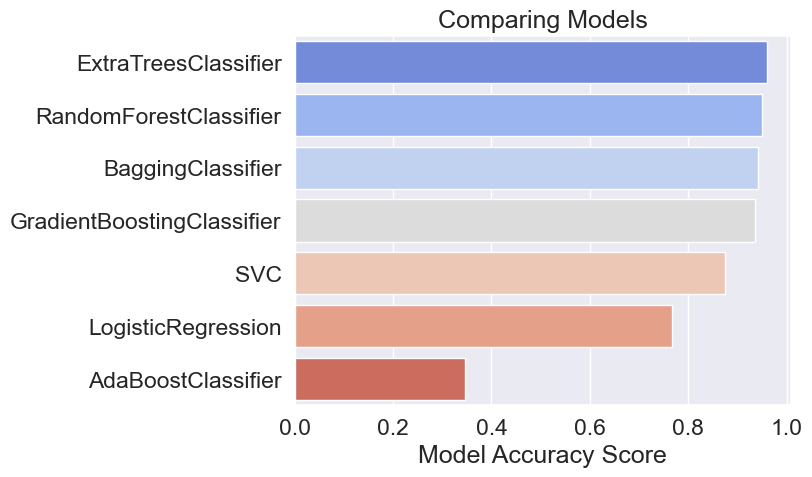

In [164]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='coolwarm')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

The models with the best accuracy are **ExtraTreesClassifier** with 96.014% and **RandomForestClassifier** with 94.927% of accuracy.

### 4.4.2 Cross validation score
In order to evaluate the performance of the models we are going to user Cross-validation technique.

In [165]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [166]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [167]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred_dict[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff
    


::: Model: RandomForestClassifier::: 
score:[0.91847826 0.93478261 0.94021739 0.92119565 0.93206522]
Score mean: 0.9293
Difference between Accuracy score and cross validation score is 0.0199

::: Model: ExtraTreesClassifier::: 
score:[0.92663043 0.94565217 0.93478261 0.93478261 0.92934783]
Score mean: 0.9342
Difference between Accuracy score and cross validation score is 0.0259

::: Model: LogisticRegression::: 
score:[0.7798913  0.79076087 0.79347826 0.77717391 0.79619565]
Score mean: 0.7875
Difference between Accuracy score and cross validation score is -0.0212

::: Model: SVC::: 
score:[0.85869565 0.86956522 0.875      0.85597826 0.86956522]
Score mean: 0.8658
Difference between Accuracy score and cross validation score is 0.0092

::: Model: GradientBoostingClassifier::: 
score:[0.89945652 0.91576087 0.94293478 0.9076087  0.9076087 ]
Score mean: 0.9147
Difference between Accuracy score and cross validation score is 0.0201

::: Model: AdaBoostClassifier::: 
score:[0.37228261 0.37228

In [168]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

,Model,Training Accuracy,Model Accuracy Score,CV score mean,Diff Acc and cv score
id,,,,,
ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1306642526),...",1.000000,0.960145,0.934239,0.025906
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.949275,0.929348,0.019928
BaggingClassifier,(DecisionTreeClassifier(random_state=146321140...,0.996894,0.942029,0.903804,0.038225
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.999224,0.934783,0.914674,0.020109
SVC,SVC(),0.880435,0.875000,0.865761,0.009239
LogisticRegression,LogisticRegression(),0.786491,0.766304,0.787500,-0.021196
AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.377329,0.346014,0.373913,-0.027899


After applying cross-validation technique we observe the better cross-validation score is for RandomForestClassifier and the difference with accuracy score is 0.019928 confirming as follows:

**RandomForestClassifier is our best Model**

## 4.5 Hyper Parameter Tuning
### 4.5.1 Finding the best parameters for RandomForestClassifier

In [169]:
random_state

63

In [170]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [171]:
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 1000], 
             'n_estimators': [50, 100, 300], 
             'max_features': [None, 'sqrt', 'log2'], 
             'max_depth': [5, 10, 16 ], 
             'max_leaf_nodes': [25, 35, 40] } 


# Build the model 
model = RandomForestClassifier()

In [172]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

Wall time: 18min 53s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 16],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [25, 35, 40],
                         'n_estimators': [50, 100, 300],
                         'random_state': [63, 10, 1000]})

In [173]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for RandomForestClassifier model:")
best_params

Best Parameters for RandomForestClassifier model:


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 40,
 'n_estimators': 100,
 'random_state': 63}

These are the best parameters for training the model.

In [174]:
best_model

RandomForestClassifier(max_depth=10, max_features=None, max_leaf_nodes=40,
                       random_state=63)

## 4.6 Final Model

In [175]:
# Create the model with the best parameters
best_model = RandomForestClassifier(max_depth=10, max_features=None, max_leaf_nodes=40, n_estimators=300, random_state=55)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 92.39%


The accuracy for the final model is 90.58%. We set random_state as 55 because the accuracy is better.

## 4.6.1 Plotting ROC and compare AUC for the best model

In [176]:
from sklearn.multiclass import OneVsRestClassifier
# Create the classifier
classifier = OneVsRestClassifier(best_model)

# Train the model
classifier.fit(x_train, y_train)

# Get the decision function scores for each class
y_score = classifier.predict_proba(x_test)

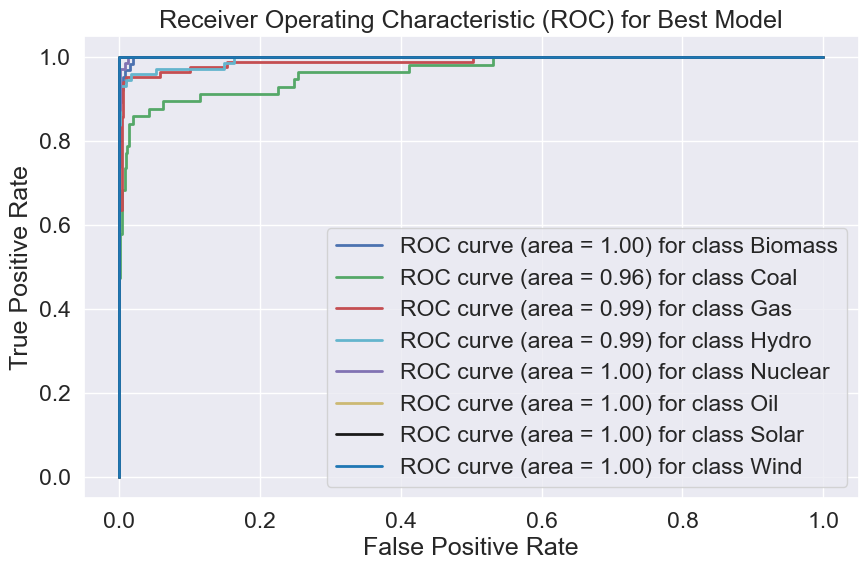

In [177]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(category_mappings['primary_fuel'])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 6))
# one color for each category
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#1f77b4']

# Plot a roc curve for each category
for i, color in zip(range(len(category_mappings['primary_fuel'])), colors):
    class_name = category_mappings['primary_fuel'][i]
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {class_name}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Best Model')
plt.legend(loc="lower right")
plt.show()

Here we can see the area under the curve for each category we apply the best model. RandomForestClassifier in our case.

Since almost all the auc values for each class are close to 1 or are 1, which is desirable, means that the model has a high discrimination capacity.

### 4.6.3 Saving the model

In [178]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/primaryfuel_classifier_model.pkl")

['models/primaryfuel_classifier_model.pkl']

### 4.6.4  Predicting the saved model

In [179]:
# Lets load the saved model and get the predictions
model = joblib.load("models/primaryfuel_classifier_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 92.391 %


,0,1,2,3,4,5,6,7,8,9,...,542,543,544,545,546,547,548,549,550,551
Predicted,5.0,5.0,6.0,4.0,4.0,2.0,1.0,4.0,0.0,4.0,...,7.0,2.0,1.0,5.0,2.0,3.0,6.0,5.0,2.0,1.0
Original,5.0,5.0,6.0,4.0,4.0,2.0,1.0,4.0,0.0,4.0,...,7.0,2.0,1.0,2.0,2.0,3.0,6.0,5.0,2.0,1.0


These are the predicted values in the fraction of the dataset we appart for testing to compare the prediction with accuracy of 92.391%.

**Final Conclusions:**

- The given dataset consists of 27 columns however, we drop some columns due to they had a lot of missing values or they do no add valuable info for our study. Therefore, we are doing EDA analysis on 13 features. We set initially the target variable as capacity_mw, that is continuous, for the regreesion prediction model and primary_fuel, that is categorical, for the classification prediction model.
- The final regression model is RandomForestRegressor with a R2 score 86.81% for predicting capacity_mw
- The final classification model is RandomForestClassifier with accuracy_score of 92.391% for predicting primary_fuel.
- Eliminating the outliers represented the elimination of 4.53% of the total records (39/861 rows). We set the threshold as 3.2 in order to conserve aproximately 3% of the data.
- In order to avoid multicollinearity issue we drop 1 columns.

_I would be glad if you could suggest me any improvements._